# Day 1

## 2. BLASTn of mini reads subsets versus refseq viral database
#### Initialise modules and create relavent directories

In [3]:
module load blast
module load seqkit
module load kraken2
module load bracken

In [4]:
mkdir -p /shared/projects/2314_medbioinfo/aonghus/MedBioinfo/analyses/blastn
cd /shared/projects/2314_medbioinfo/aonghus/MedBioinfo/analyses/blastn
mkdir -p ./outputs

#### Create a blast index reference database from the RefSeq viral genomic multi FASTA file

In [5]:
mkdir -p ../../data/blast_db
zcat /shared/projects/2314_medbioinfo/refseq/viral.genomic.fna.gz | makeblastdb -dbtype nucl \
-out ../../data/blast_db/refseq_viral_genomic -title refseq_viral_genomic



Building a new DB, current time: 06/14/2023 14:15:44
New DB name:   /shared/ifbstor1/projects/2314_medbioinfo/aonghus/MedBioinfo/data/blast_db/refseq_viral_genomic
New DB title:  refseq_viral_genomic
Sequence type: Nucleotide
Deleted existing Nucleotide BLAST database named /shared/ifbstor1/projects/2314_medbioinfo/aonghus/MedBioinfo/data/blast_db/refseq_viral_genomic
Keep MBits: T
Maximum file size: 1000000000B
Adding sequences from FASTA; added 14813 sequences in 14.3989 seconds.




#### Check status of database created

In [6]:
blastdbcmd -info -db ../../data/blast_db/refseq_viral_genomic

Database: refseq_viral_genomic
	14,813 sequences; 469,589,088 total bases

Date: Jun 14, 2023  2:15 PM	Longest sequence: 2,473,870 bases

BLASTDB Version: 5

Volumes:
	/shared/ifbstor1/projects/2314_medbioinfo/aonghus/MedBioinfo/data/blast_db/refseq_viral_genomic


#### seqkit to convert compressed fastq file to fasta file and then to extract subsets with:
    - 100 reads
    - 1000 reads
    - 10,000 reads

In [7]:
seqkit fq2fa ../../data/merged_pairs/ERR6913138.flash.extendedFrags.fastq.gz --threads 1 \
> ../../data/merged_pairs/ERR6913138.flash.extendedFrags.fna

seqkit range -r 1:100 ../../data/merged_pairs/ERR6913138.flash.extendedFrags.fna --threads 1 \
-o ../../data/merged_pairs/ERR6913138.flash.extenededFrags_100.fna
seqkit range -r 101:1100 ../../data/merged_pairs/ERR6913138.flash.extendedFrags.fna --threads 1 \
-o ../../data/merged_pairs/ERR6913138.flash.extenededFrags_1000.fna
seqkit range -r 1102:11101 ../../data/merged_pairs/ERR6913138.flash.extendedFrags.fna --threads 1 \
-o ../../data/merged_pairs/ERR6913138.flash.extenededFrags_10000.fna

seqkit stats ../../data/merged_pairs/ERR6913138.flash.extenededFrags_1*.fna

file                                                               format  type  num_seqs    sum_len  min_len  avg_len  max_len
../../data/merged_pairs/ERR6913138.flash.extenededFrags_10000.fna  FASTA   DNA     10,000  1,643,934       36    164.4      292
../../data/merged_pairs/ERR6913138.flash.extenededFrags_1000.fna   FASTA   DNA      1,000    162,879       38    162.9      291
../../data/merged_pairs/ERR6913138.flash.extenededFrags_100.fna    FASTA   DNA        100     15,667       59    156.7      287
../../data/merged_pairs/ERR6913138.flash.extenededFrags_10.fna     FASTA   DNA         10      1,293       78    129.3      186


#### sbatch script to blastn the 100, 1000 & 10000 reads subset against the refseq viral database

In [8]:
cp ../../scripts/generic_sbatch_array.sh ../../scripts/fastq_subsamples_blastn_vs_viral_refseq_sbatch.sh

In [10]:
sbatch ../../scripts/fastq_subsamples_blastn_vs_viral_refseq_sbatch.sh

Submitted batch job 33793674


In [37]:
sacct | tail

33580617.2          blastn_1000sq        4      250Gn             COMPLETED      0:0 2023-05-29T13:54:10   00:00:03      1224K     cpu-node-12 2314_medbioinfo 
33580671             blastn_viral        4      250Gn   02:00:00  COMPLETED      0:0 2023-05-29T13:57:33   00:00:06                cpu-node-80 2314_medbioinfo 
33580671.ba+                batch        4      250Gn             COMPLETED      0:0 2023-05-29T13:57:33   00:00:06      1244K     cpu-node-80 2314_medbioinfo 
33580671.0           blastn_100sq        4      250Gn             COMPLETED      0:0 2023-05-29T13:57:34   00:00:00      1176K     cpu-node-80 2314_medbioinfo 
33580671.1          blastn_1000sq        4      250Gn             COMPLETED      0:0 2023-05-29T13:57:35   00:00:01      1172K     cpu-node-80 2314_medbioinfo 
33580671.2          blastn_1000sq        4      250Gn             COMPLETED      0:0 2023-05-29T13:57:36   00:00:02      1176K     cpu-node-80 2314_medbioinfo 
33580671.3                   gzip       

## 4 - sbatch job arrays application: BLASTn of full FASTQ versus refseq viral database

In [38]:
cp ../../scripts/fastq_subsamples_blastn_vs_viral_refseq_sbatch.sh ../../scripts/fastq_full_samples_blastn_vs_refseq_sbatch.sh

In [49]:
sbatch ../../scripts/fastq_full_samples_blastn_vs_refseq_sbatch.sh

Submitted batch job 33581786


In [57]:
sacct | tail -n 40

33581786_1           blastn_viral       24      250Gn   02:00:00  COMPLETED      0:0 2023-05-29T14:34:12   00:02:13                 cpu-node-6 2314_medbioinfo 
33581786_1.+                batch       24      250Gn             COMPLETED      0:0 2023-05-29T14:34:12   00:02:13      7924K      cpu-node-6 2314_medbioinfo 
33581786_1.0               seqkit       24      250Gn             COMPLETED      0:0 2023-05-29T14:34:14   00:00:03      1232K      cpu-node-6 2314_medbioinfo 
33581786_1.1           ERR6913138       24      250Gn             COMPLETED      0:0 2023-05-29T14:34:17   00:01:40    637544K      cpu-node-6 2314_medbioinfo 
33581786_1.2                 gzip       24      250Gn             COMPLETED      0:0 2023-05-29T14:35:57   00:00:28      1232K      cpu-node-6 2314_medbioinfo 
33581786_2           blastn_viral       24      250Gn   02:00:00  COMPLETED      0:0 2023-05-29T14:34:12   00:03:22                cpu-node-52 2314_medbioinfo 
33581786_2.+                batch       

## How many reads to viral genome alingments? 

In [115]:
cut -f 2 *_blastn_vs_viral.out | sort -n | uniq -c | sort > full_refseq_viral_hits_sorted.counts

In [78]:
zgrep NC_031915.1 /shared/projects/2314_medbioinfo/refseq/viral.genomic.fna.gz  
zgrep NC_055004.1 /shared/projects/2314_medbioinfo/refseq/viral.genomic.fna.gz 

>NC_031915.1 Streptococcus phage phiARI0468-4, complete genome
>NC_055004.1 Lactococcus phage vB_Llc_bIBBp6/4, complete genome


In [116]:
sed -E 's/^ +//' full_refseq_viral_hits_sorted.counts > full_refseq_viral_hits_sorted_counts.noleadingspace
head full_refseq_viral_hits_sorted_counts.noleadingspace

102 NC_031915.1
102 NC_055004.1
102 NC_055018.1
103 NC_054994.1
104 NC_055003.1
105 NC_055009.1
106 NC_013085.1
106 NC_055006.1
107 NC_055002.1
107 NC_055011.1


In [117]:
cut -f2 -d" " full_refseq_viral_hits_sorted_counts.noleadingspace > full_refseq_viral_hits_sorted.ids
head full_refseq_viral_hits_sorted.ids

NC_031915.1
NC_055004.1
NC_055018.1
NC_054994.1
NC_055003.1
NC_055009.1
NC_013085.1
NC_055006.1
NC_055002.1
NC_055011.1


In [120]:
sed 's/^/\^>/' full_refseq_viral_hits_sorted.ids > full_refseq_viral_hits_sorted_ids.patterns
head full_refseq_viral_hits_sorted_ids.patterns

^>NC_031915.1
^>NC_055004.1
^>NC_055018.1
^>NC_054994.1
^>NC_055003.1
^>NC_055009.1
^>NC_013085.1
^>NC_055006.1
^>NC_055002.1
^>NC_055011.1


In [121]:
zgrep -f full_refseq_viral_hits_sorted_ids.patterns /shared/projects/2314_medbioinfo/refseq/viral.genomic.fna.gz > full_refseq_viral_hits_sorted_refseq_definitions.txt
head full_refseq_viral_hits_sorted_refseq_definitions.txt

>NC_028099.1 Felis catus gammaherpesvirus 1 isolate 31286, complete genome
>NC_028132.1 Apple hammerhead viroid-like circular RNA, complete genome
>NC_028491.1 Diatraea saccharalis granulovirus, complete genome
>NC_033774.1 Pepper chlorotic spot virus isolate 14YV733 segment L, complete sequence
>NC_018464.1 Shamonda virus N and NSs genes, segment S, genomic RNA, isolate Ib An 5550
>NC_022089.1 Parvovirus NIH-CQV putative 15-kDa protein, putative replication associated protein (rep), and putative capsid protein (cap) genes, complete cds
>NC_023153.1 Citrus endogenous pararetrovirus clone CB16-3, complete genome
>NC_023639.1 Mimivirus terra2 genome
>NC_007605.1 Human gammaherpesvirus 4, complete genome
>NC_009334.1 Human herpesvirus 4, complete genome


In [123]:
sed -E 's/^>//' full_refseq_viral_hits_sorted_refseq_definitions.txt > full_refseq_viral_hits_sorted_refseq_definitions_noleadinggt.txt
sort -k1 full_refseq_viral_hits_sorted_refseq_definitions_noleadinggt.txt > full_refseq_viral_hits_sorted_refseq_definitions_noleadinggt_sorted.txt
sort -k2 full_refseq_viral_hits_sorted_counts.noleadingspace > full_refseq_viral_hits_sorted_counts_noleadingspace.sorted
join -1 2 -2 1 full_refseq_viral_hits_sorted_counts_noleadingspace.sorted full_refseq_viral_hits_sorted_refseq_definitions_noleadinggt_sorted.txt | sort -n -k2 > full_refseq_viral_hits_sorted.counts.definitions
head full_refseq_viral_hits_sorted.counts.definitions

AC_000006.1 1 Human adenovirus D, complete genome
AC_000011.1 1 Simian adenovirus 25, complete genome
NC_000852.5 1 Paramecium bursaria Chlorella virus 1, complete genome
NC_001604.1 1 Enterobacteria phage T7, complete genome
NC_001648.1 1 Cassava vein mosaic virus, complete genome
NC_001716.2 1 Human herpesvirus 7, complete genome
NC_001731.1 1 Molluscum contagiosum virus subtype 1, complete genome
NC_001806.2 1 Human herpesvirus 1 strain 17, complete genome
NC_001993.1 1 Melanoplus sanguinipes entomopoxvirus, complete genome
NC_003278.1 1 Pseudomonas phage phiCTX, complete genome


In [1]:
sacct -P --format=JobID%15,JobName%18,ReqCPUS,ReqMem,Timelimit,State,ExitCode,Start,elapsedRAW,CPUTimeRAW,MaxRSS,NodeList -j 33581786 | grep ERR > blastn_full_FASTQ_vs_viral_sbatch_array.sacct
cat blastn_full_FASTQ_vs_viral_sbatch_array.sacct

33581786_1.1|ERR6913138|24|250Gn||COMPLETED|0:0|2023-05-29T14:34:17|100|2400|637544K|cpu-node-6
33581786_2.1|ERR6913234|24|250Gn||COMPLETED|0:0|2023-05-29T14:34:19|157|3768|673016K|cpu-node-52
33581786_3.1|ERR6913296|24|250Gn||COMPLETED|0:0|2023-05-29T14:34:17|90|2160|486616K|cpu-node-53
33581786_4.1|ERR6913325|24|250Gn||COMPLETED|0:0|2023-05-29T14:34:18|104|2496|689556K|cpu-node-54
33581786_5.1|ERR6913302|24|250Gn||COMPLETED|0:0|2023-05-29T14:34:16|29|696|1220K|cpu-node-55
33581786_6.1|ERR6913331|24|250Gn||COMPLETED|0:0|2023-05-29T14:35:17|49|1176|390996K|cpu-node-57
33581786_7.1|ERR6913304|24|250Gn||COMPLETED|0:0|2023-05-29T14:36:15|40|960|734940K|cpu-node-61
33581786_8.1|ERR6913333|24|250Gn||COMPLETED|0:0|2023-05-29T14:36:38|114|2736|712392K|cpu-node-55


## 5 - Benchmarking to estimate cpu.hours
#### First import sacct result into shared sql table
#### Then check that the correct job ID was imported

In [2]:
sqlite3 -batch -separator "|" /shared/projects/2314_medbioinfo/pascal/central_database/sample_collab.db \
".import ./blastn_full_FASTQ_vs_viral_sbatch_array.sacct blastn_viral_resources_used"

In [3]:
sqlite3 -box -batch /shared/projects/2314_medbioinfo/pascal/central_database/sample_collab.db \
"select * from blastn_viral_resources_used where JobID like '33581786%'"

┌──────────────┬────────────┬─────────┬────────┬───────────┬───────────┬──────────┬─────────────────────┬────────────┬────────────┬─────────┬─────────────┐
│    JobID     │  JobName   │ ReqCPUS │ ReqMem │ Timelimit │   State   │ ExitCode │        Start        │ ElapsedRAW │ CPUTimeRAW │ MaxRSS  │  NodeList   │
├──────────────┼────────────┼─────────┼────────┼───────────┼───────────┼──────────┼─────────────────────┼────────────┼────────────┼─────────┼─────────────┤
│ 33581786_1.1 │ ERR6913138 │ 24      │ 250Gn  │           │ COMPLETED │ 0:0      │ 2023-05-29T14:34:17 │ 100        │ 2400       │ 637544K │ cpu-node-6  │
│ 33581786_2.1 │ ERR6913234 │ 24      │ 250Gn  │           │ COMPLETED │ 0:0      │ 2023-05-29T14:34:19 │ 157        │ 3768       │ 673016K │ cpu-node-52 │
│ 33581786_3.1 │ ERR6913296 │ 24      │ 250Gn  │           │ COMPLETED │ 0:0      │ 2023-05-29T14:34:17 │ 90         │ 2160       │ 486616K │ cpu-node-53 │
│ 33581786_4.1 │ ERR6913325 │ 24      │ 250Gn  │           │ COM

#### Now we move to an R kernel and connect to SQLite3 via `DBI` library

In [9]:
library(DBI)
mydb <- dbConnect(RSQLite::SQLite(), "/shared/projects/2314_medbioinfo/pascal/central_database/sample_collab.db")
res_used <- dbGetQuery(mydb, 
                       'select JobName, ReqCPUS, CPUTimeRAW, MaxRSS, 
                        read_count, base_count, patient_code, 
                        host_disease_status, nuc, ElapsedRAW from 
                        blastn_viral_resources_used 
                        cpu inner join sample_annot spl on 
                        cpu.JobName=spl.run_accession')
head(res_used)

,JobName,ReqCPUS,CPUTimeRAW,MaxRSS,read_count,base_count,patient_code,host_disease_status,nuc,ElapsedRAW
,<chr>,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>
1,ERR6913101,1,87,490192K,658268,80692720,P4,SARS-CoV-2 positive,DNA,87
2,ERR6913102,1,0,968K,102524,13193813,P11,SARS-CoV-2 positive,DNA,0
3,ERR6913103,2,80,175240K,385740,49060845,P19,SARS-CoV-2 positive,DNA,40
4,ERR6913104,12,396,432180K,610606,76430173,P22,SARS-CoV-2 positive,DNA,33
5,ERR6913106,24,1632,515412K,1271618,168661241,P55,SARS-CoV-2 positive,DNA,68
6,ERR6913107,1,21,1044K,190648,24785538,P66,SARS-CoV-2 positive,DNA,21


In [10]:
res_used$minutes <- as.integer(res_used$CPUTimeRAW) / 60
res_used$read_M  <- res_used$read_count / 1000000
res_used$ram_M   <- as.numeric(sub('K$','', res_used$MaxRSS, perl = TRUE)) / 1000
res_used$pat     <- as.factor(res_used$patient_code)
head(res_used)

,JobName,ReqCPUS,CPUTimeRAW,MaxRSS,read_count,base_count,patient_code,host_disease_status,nuc,ElapsedRAW,minutes,read_M,ram_M,pat
,<chr>,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<fct>
1,ERR6913101,1,87,490192K,658268,80692720,P4,SARS-CoV-2 positive,DNA,87,1.450000,0.658268,490.192,P4
2,ERR6913102,1,0,968K,102524,13193813,P11,SARS-CoV-2 positive,DNA,0,0.000000,0.102524,0.968,P11
3,ERR6913103,2,80,175240K,385740,49060845,P19,SARS-CoV-2 positive,DNA,40,1.333333,0.385740,175.240,P19
4,ERR6913104,12,396,432180K,610606,76430173,P22,SARS-CoV-2 positive,DNA,33,6.600000,0.610606,432.180,P22
5,ERR6913106,24,1632,515412K,1271618,168661241,P55,SARS-CoV-2 positive,DNA,68,27.200000,1.271618,515.412,P55
6,ERR6913107,1,21,1044K,190648,24785538,P66,SARS-CoV-2 positive,DNA,21,0.350000,0.190648,1.044,P66


#### Load R packages and plot benchmarked results of CPU time (mins) vs Read Count for incremental numbers of CPUs used.

`geom_smooth()` using formula 'y ~ x'



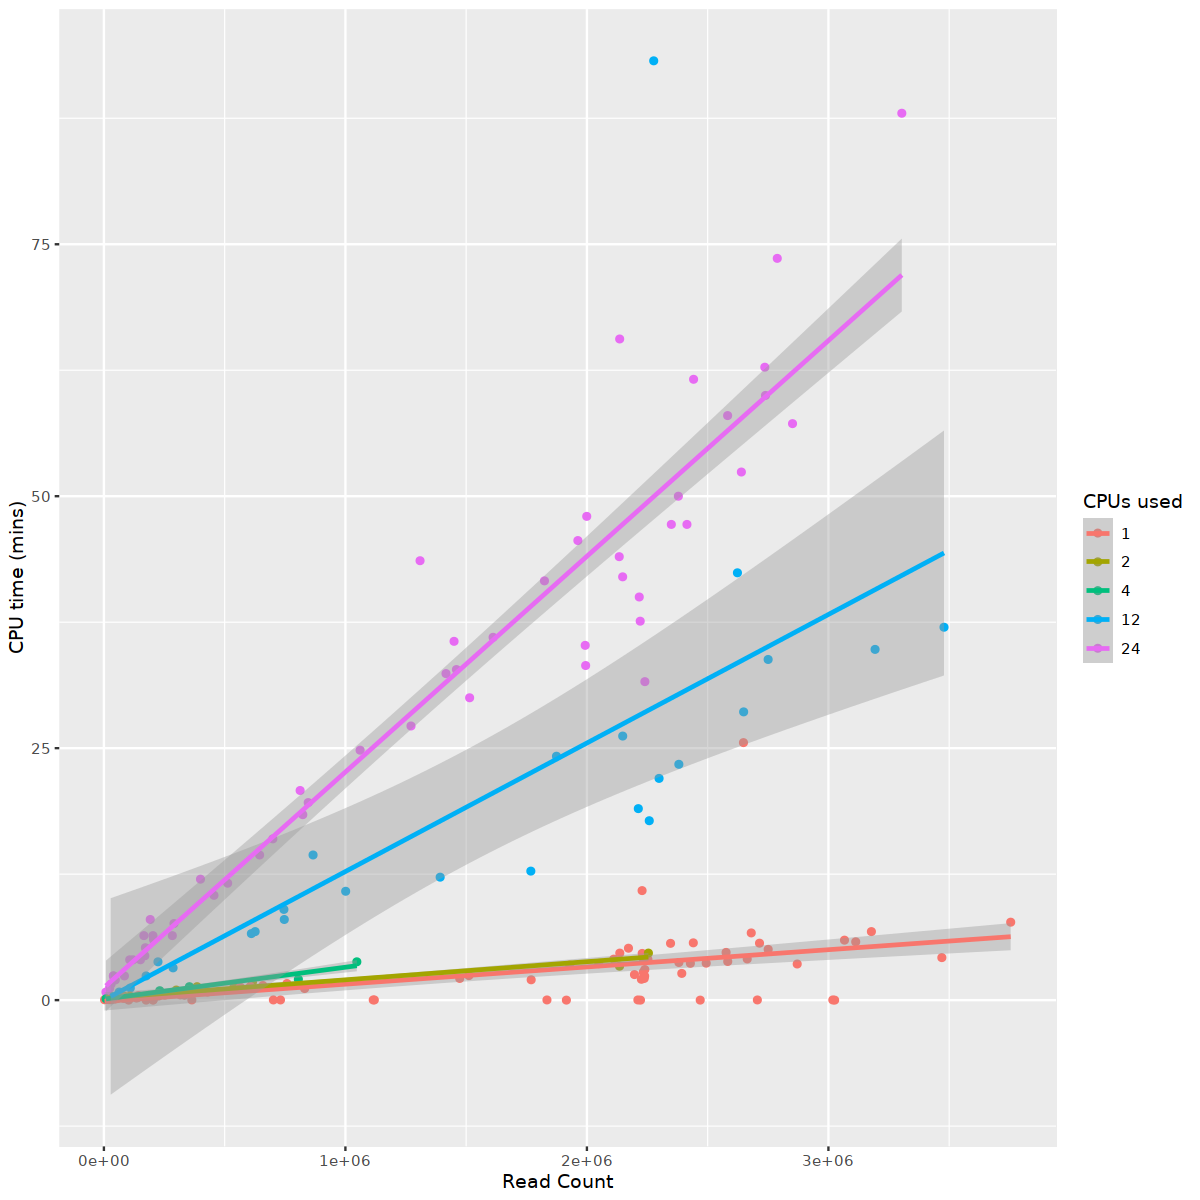

In [16]:
suppressPackageStartupMessages({
    library(ggplot2)
    library(tidyverse)
    library(repr)})
    
options(repr.plot.width=10, repr.plot.height=10)


res_used %>%
    ggplot(aes(x=read_count, y=minutes, group=ReqCPUS, col=as.factor(ReqCPUS))) + 
    geom_point() +
    geom_smooth(method=lm) +
    labs(col="CPUs used", x="Read Count", y="CPU time (mins)")

#### Same as above but for elapsed time taken overall. 

`geom_smooth()` using formula 'y ~ x'



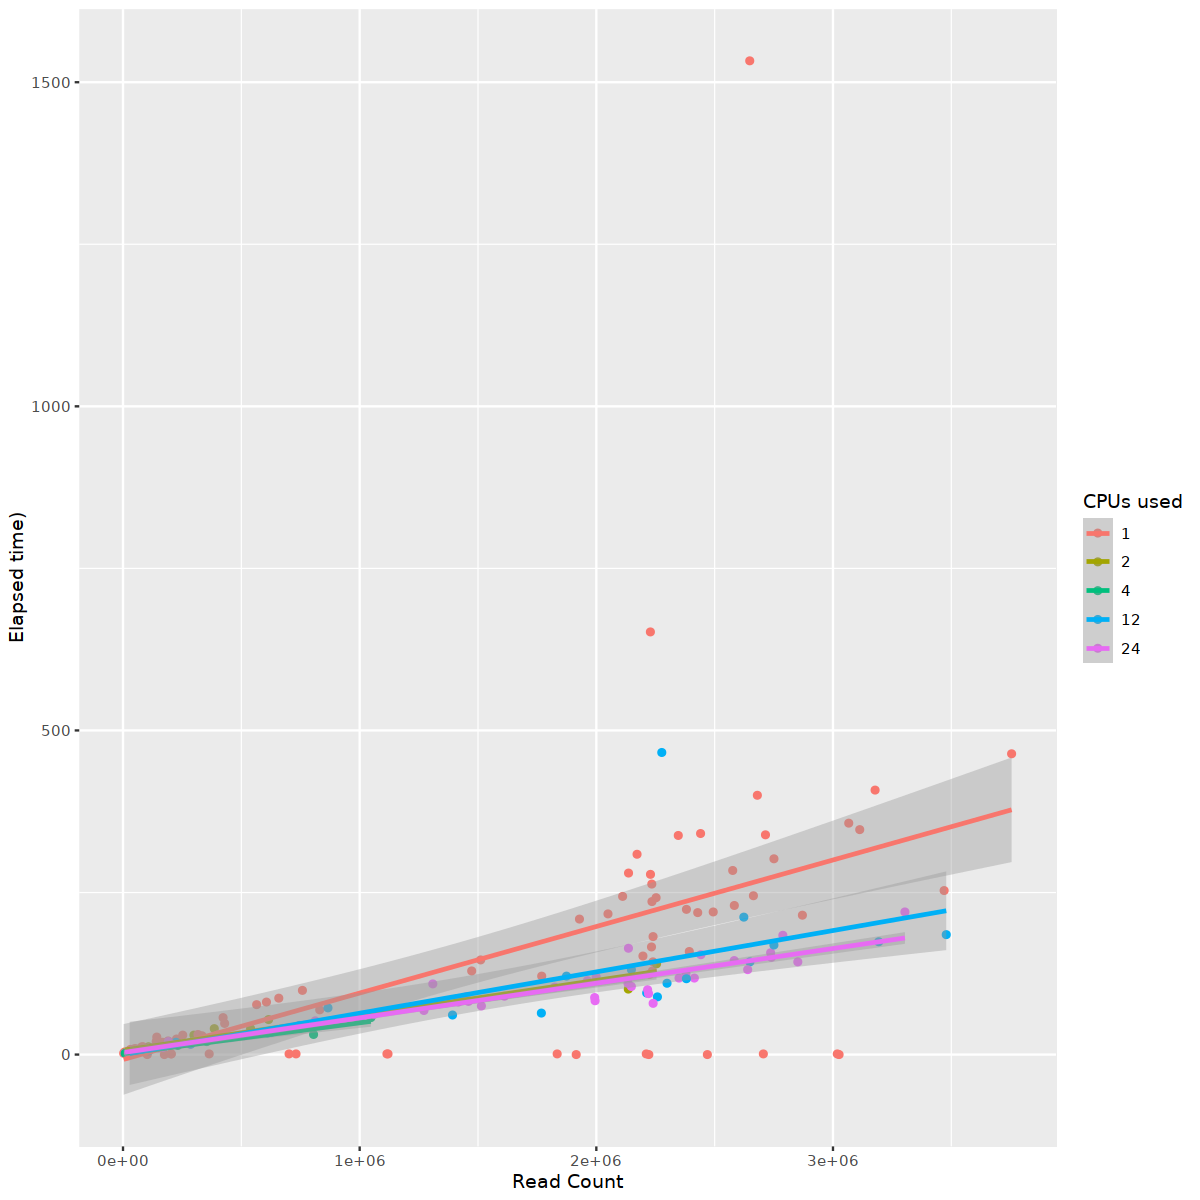

In [15]:
res_used %>%
    ggplot(aes(x=read_count, y=ElapsedRAW, group=ReqCPUS, col=as.factor(ReqCPUS))) + 
    geom_point() +
    geom_smooth(method=lm, formula=y~x) +
    labs(col="CPUs used", x="Read Count", y="Elapsed time)")

In [3]:
pwd

/shared/ifbstor1/projects/2314_medbioinfo/aonghus/MedBioinfo/analyses/blastn


#### write a sbatch script (start with a copy of previous non job array scripts versus RefSeq viral) to submit just a mini 10 reads subset for blastn against the nt database:

In [6]:
seqkit fq2fa ../../data/merged_pairs/ERR6913138.flash.extendedFrags.fastq.gz --threads 1 \
> ../../data/merged_pairs/ERR6913138.flash.extendedFrags.fna

seqkit range -r 1:10 ../../data/merged_pairs/ERR6913138.flash.extendedFrags.fna --threads 1 \
-o ../../data/merged_pairs/ERR6913138.flash.extenededFrags_10.fna

bash: ../../scripts/fastq_subsamples_blastn_vs_NT.sh: Permission denied


: 126

In [10]:
sbatch ../../scripts/fastq_subsamples_blastn_vs_NT.sh

Submitted batch job 33590722


In [3]:
sacct -P --format=JobID%20,JobName%18,ReqCPUS,ReqMem,Timelimit,State,ExitCode,Start,elapsedRaw,CPUTimeRaw,MaxRSS,MaxVMSize,NodeList -S 2023-05-30

JobID|JobName|ReqCPUS|ReqMem|Timelimit|State|ExitCode|Start|ElapsedRaw|CPUTimeRAW|MaxRSS|MaxVMSize|NodeList
33590425|jupyter|2|2Gn|12:00:00|RUNNING|0:0|2023-05-30T13:35:29|3112|6224|||cpu-node-22
33590425.batch|batch|2|2Gn||RUNNING|0:0|2023-05-30T13:35:29|3112|6224|||cpu-node-22
33590425.0|batchspawner-singleuser|2|2Gn||RUNNING|0:0|2023-05-30T13:35:30|3111|6222|||cpu-node-22
33590722|blastn_10N|4|80Gn|01:00:00|COMPLETED|0:0|2023-05-30T14:02:33|1122|4488|||cpu-node-45
33590722.batch|batch|4|80Gn||COMPLETED|0:0|2023-05-30T14:02:33|1122|4488|7916K|422288K|cpu-node-45
33590722.0|blastn_10N|4|80Gn||COMPLETED|0:0|2023-05-30T14:02:34|1118|4472|24895044K|160169028K|cpu-node-45


# Days 2 and 3
## The kraken2 k-mer read taxonomic assignation
#### Switch back to bash kernel
#### Initialise directories and cd into working directory

In [1]:
mkdir -p /shared/ifbstor1/projects/2314_medbioinfo/aonghus/MedBioinfo/analyses/kraken2
cd /shared/ifbstor1/projects/2314_medbioinfo/aonghus/MedBioinfo/analyses/kraken2

## 1-2 done on command line and not required for reproducibility workflow as only interested in batch of 8 samples
## 3 - A triple workflow (kraken2 + bracken + krona) sbatch job array on all your samples

In [ ]:
sbatch ../../scripts/kraken2_bracken_batch.sh

## 4 - Merge all 8 Krona pie charts into a single multi-Krona pie chart 

In [2]:
/shared/projects/2314_medbioinfo/kraken2/bin/ktImportText ./krona.*.txt -o ./combined_krona.html

Writing ./combined_krona.html...


### Option 3 - Benchmarking (Similar workfolow as before - overlaping with PM workflow)

In [6]:
sacct -P --format=JobID%15,JobName%18,ReqCPUS,ReqMem,Timelimit,State,ExitCode,Start,elapsedRAW,CPUTimeRAW,MaxRSS,NodeList -j 33600821 | grep ERR > k2b_sbatch_array.sacct
cat k2b_sbatch_array.sacct

33600821_1.0|ERR6913138|16|80Gn||COMPLETED|0:0|2023-05-31T11:59:10|171|2736|72326156K|cpu-node-33
33600821_1.1|ERR6913138_bracken|16|80Gn||COMPLETED|0:0|2023-05-31T12:02:01|1|16|1236K|cpu-node-33
33600821_1.2|ERR6913138_kreport2krona|16|80Gn||COMPLETED|0:0|2023-05-31T12:02:02|1|16|1240K|cpu-node-33
33600821_1.3|ERR6913138_sed|16|80Gn||COMPLETED|0:0|2023-05-31T12:02:03|0|0|1236K|cpu-node-33
33600821_1.4|ERR6913138_krona2html|16|80Gn||COMPLETED|0:0|2023-05-31T12:02:03|1|16|1240K|cpu-node-33
33600821_2.0|ERR6913234|16|80Gn||COMPLETED|0:0|2023-05-31T11:59:09|154|2464|72319376K|cpu-node-39
33600821_2.1|ERR6913234_bracken|16|80Gn||COMPLETED|0:0|2023-05-31T12:01:44|0|0|1240K|cpu-node-39
33600821_2.2|ERR6913234_kreport2krona|16|80Gn||COMPLETED|0:0|2023-05-31T12:01:44|1|16|1232K|cpu-node-39
33600821_2.3|ERR6913234_sed|16|80Gn||COMPLETED|0:0|2023-05-31T12:01:45|0|0|1236K|cpu-node-39
33600821_2.4|ERR6913234_krona2html|16|80Gn||COMPLETED|0:0|2023-05-31T12:01:45|0|0|1232K|cpu-node-39
33600821_3.0|E

In [7]:
sqlite3 -batch /shared/projects/2314_medbioinfo/pascal/central_database/sample_collab.db \
".tables"

CtValues                        bracken_abundances_long       
ENARunTable                     kraken2_viral_resources_used  
SampleOverviews                 kraken2_viral_resources_used_2
SraRunTable                     sample2bioinformatician       
bioinformaticians               sample_annot                  
blastn_viral_resources_used     sample_annot_all              


In [16]:
sqlite3 -batch -separator "|" /shared/projects/2314_medbioinfo/pascal/central_database/sample_collab.db \
".import ./k2b_sbatch_array.sacct kraken2_viral_resources_used"

## PM - Explore the microbiome biodiversity across a compilation of all 250 samples


## 1 - Load the SLURM resources used for the full kraken2 computation into the shared central DB

In [19]:
sqlite3 -box -batch /shared/projects/2314_medbioinfo/pascal/central_database/sample_collab.db \
"select * from kraken2_viral_resources_used where JobID like '33600821%'"

┌──────────────┬──────────────────────────┬─────────┬────────┬───────────┬───────────┬──────────┬─────────────────────┬────────────┬────────────┬───────────┬─────────────┐
│    JobID     │         JobName          │ ReqCPUS │ ReqMem │ Timelimit │   State   │ ExitCode │        Start        │ ElapsedRAW │ CPUTimeRAW │  MaxRSS   │  NodeList   │
├──────────────┼──────────────────────────┼─────────┼────────┼───────────┼───────────┼──────────┼─────────────────────┼────────────┼────────────┼───────────┼─────────────┤
│ 33600821_1.0 │ ERR6913138               │ 16      │ 80Gn   │           │ COMPLETED │ 0:0      │ 2023-05-31T11:59:10 │ 171        │ 2736       │ 72326156K │ cpu-node-33 │
│ 33600821_1.1 │ ERR6913138_bracken       │ 16      │ 80Gn   │           │ COMPLETED │ 0:0      │ 2023-05-31T12:02:01 │ 1          │ 16         │ 1236K     │ cpu-node-33 │
│ 33600821_1.2 │ ERR6913138_kreport2krona │ 16      │ 80Gn   │           │ COMPLETED │ 0:0      │ 2023-05-31T12:02:02 │ 1          │ 16     

In [41]:
library(DBI)
mydb <- dbConnect(RSQLite::SQLite(), "/shared/projects/2314_medbioinfo/pascal/central_database/sample_collab.db")
res_used <- dbGetQuery(mydb, 
                       'select JobName, ReqCPUS, CPUTimeRAW, MaxRSS, 
                        read_count, base_count, patient_code, 
                        host_disease_status, nuc, ElapsedRAW from 
                        kraken2_viral_resources_used 
                        cpu inner join sample_annot spl on 
                        cpu.JobName=spl.run_accession')
head(res_used)

,JobName,ReqCPUS,CPUTimeRAW,MaxRSS,read_count,base_count,patient_code,host_disease_status,nuc,ElapsedRAW
,<chr>,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>
1,ERR6913174,4,360,49486432K,191868,21290514,NP_A,SARS-CoV-2 negative,DNA,90
2,ERR6913270,4,500,72258600K,290140,32101115,NP_A,SARS-CoV-2 negative,RNA,125
3,ERR6913175,4,380,69373444K,399904,42664989,NP_B,SARS-CoV-2 negative,DNA,95
4,ERR6913271,4,988,72408984K,1309086,152208469,NP_B,SARS-CoV-2 negative,RNA,247
5,ERR6913176,4,412,72328820K,1449880,157565410,NP_C,SARS-CoV-2 negative,DNA,103
6,ERR6913272,4,364,48652860K,106838,12403605,NP_C,SARS-CoV-2 negative,RNA,91


In [42]:
res_used$minutes <- as.integer(res_used$CPUTimeRAW) / 60
res_used$read_M  <- res_used$read_count / 1000000
# There are simne values already submitted in MB format so need to account for these during conversion from KB to MB step.
idx_m <- grep("M", res_used$MaxRSS)
idx_k <- grep("K", res_used$MaxRSS)
res_used$ram_M <- res_used$MaxRSS
res_used$ram_M[idx_m] <- as.numeric(sub('M$','', res_used$MaxRSS[idx_m], perl = TRUE))
res_used$ram_M[idx_k] <- as.numeric(sub('K$','', res_used$MaxRSS[idx_k], perl = TRUE)) / 1000
res_used$pat     <- as.factor(res_used$patient_code)
head(res_used)

,JobName,ReqCPUS,CPUTimeRAW,MaxRSS,read_count,base_count,patient_code,host_disease_status,nuc,ElapsedRAW,minutes,read_M,ram_M,pat
,<chr>,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>,<fct>
1,ERR6913174,4,360,49486432K,191868,21290514,NP_A,SARS-CoV-2 negative,DNA,90,6.000000,0.191868,49486.432,NP_A
2,ERR6913270,4,500,72258600K,290140,32101115,NP_A,SARS-CoV-2 negative,RNA,125,8.333333,0.290140,72258.6,NP_A
3,ERR6913175,4,380,69373444K,399904,42664989,NP_B,SARS-CoV-2 negative,DNA,95,6.333333,0.399904,69373.444,NP_B
4,ERR6913271,4,988,72408984K,1309086,152208469,NP_B,SARS-CoV-2 negative,RNA,247,16.466667,1.309086,72408.984,NP_B
5,ERR6913176,4,412,72328820K,1449880,157565410,NP_C,SARS-CoV-2 negative,DNA,103,6.866667,1.449880,72328.82,NP_C
6,ERR6913272,4,364,48652860K,106838,12403605,NP_C,SARS-CoV-2 negative,RNA,91,6.066667,0.106838,48652.86,NP_C


`geom_smooth()` using formula 'y ~ x'



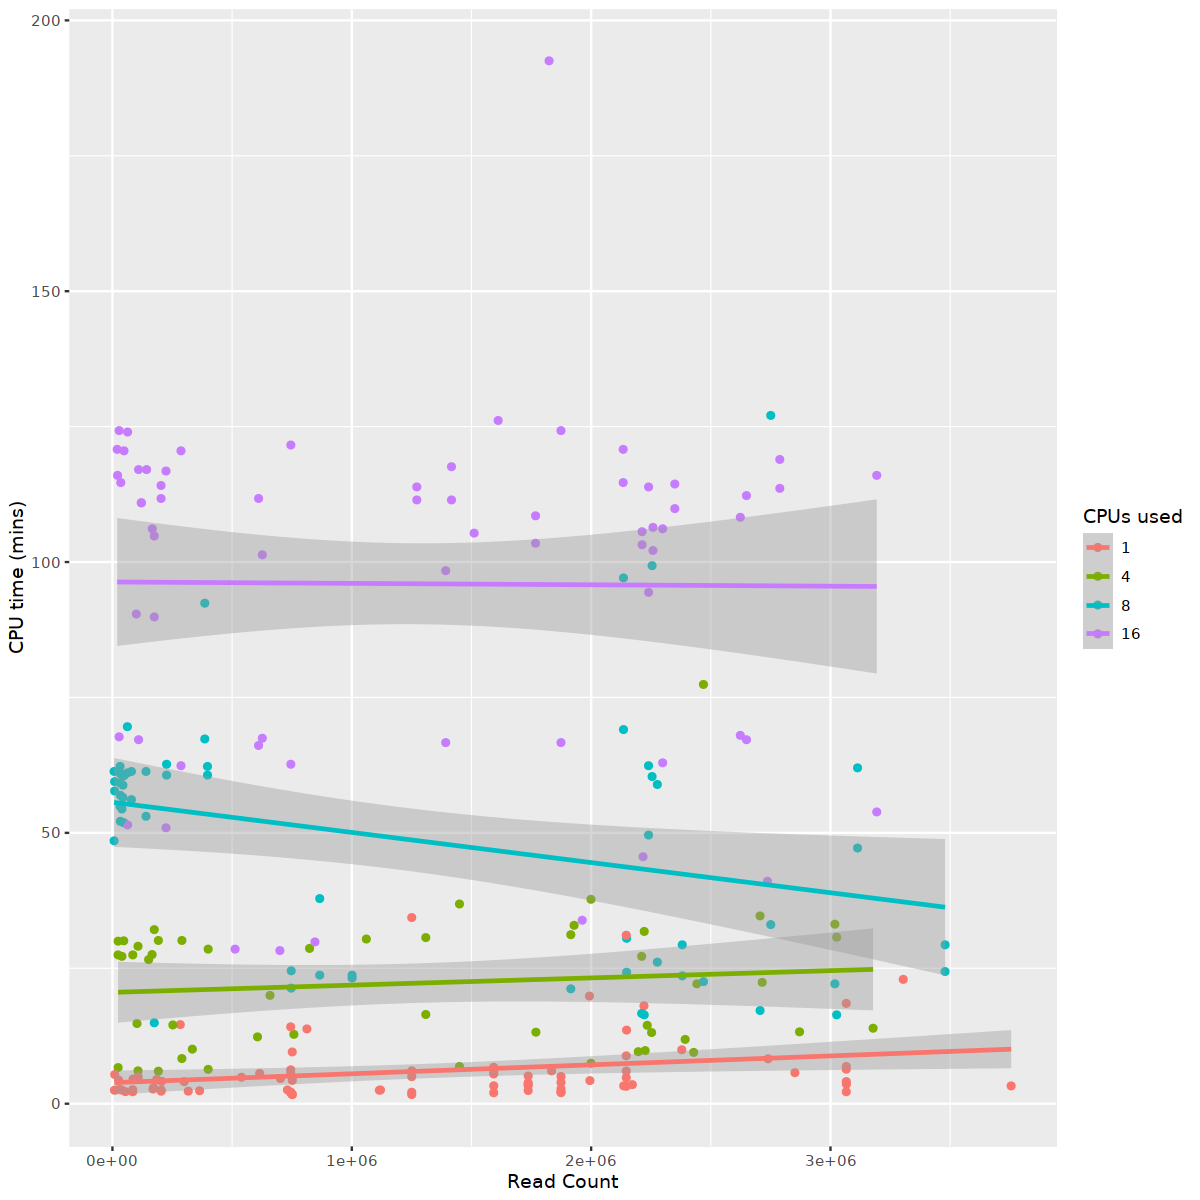

In [43]:
suppressPackageStartupMessages({
    library(ggplot2)
    library(tidyverse)
    library(repr)})
    
options(repr.plot.width=10, repr.plot.height=10)


res_used %>%
    ggplot(aes(x=read_count, y=minutes, group=ReqCPUS, col=as.factor(ReqCPUS))) + 
    geom_point() +
    geom_smooth(method=lm) +
    labs(col="CPUs used", x="Read Count", y="CPU time (mins)")

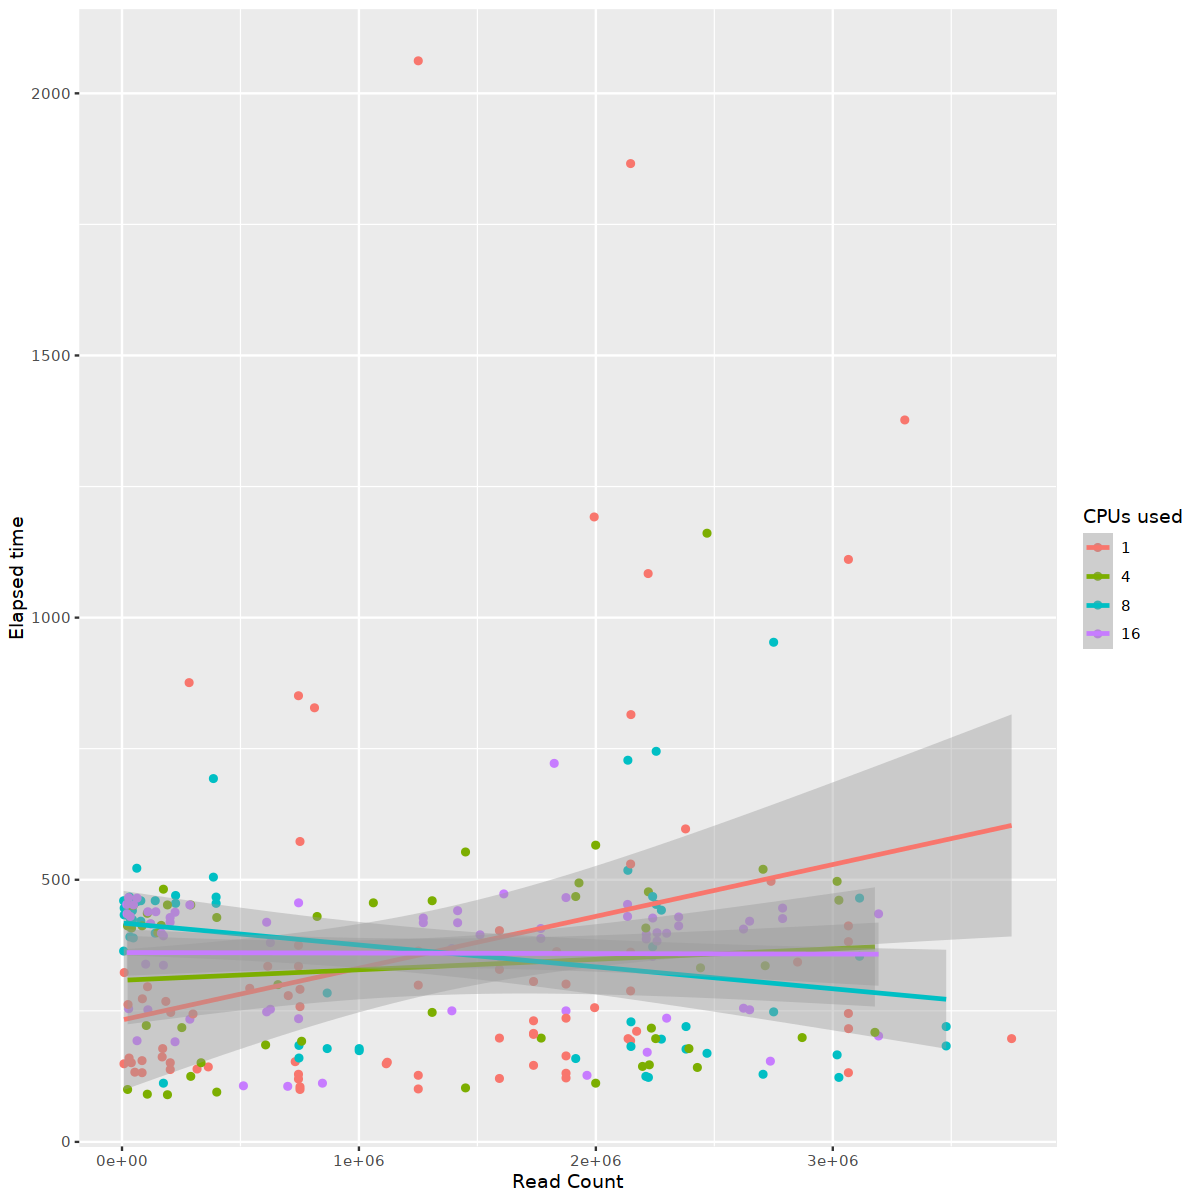

In [45]:
res_used %>%
    ggplot(aes(x=read_count, y=ElapsedRAW, group=ReqCPUS, col=as.factor(ReqCPUS))) + 
    geom_point() +
    geom_smooth(method=lm, formula=y~x) +
    labs(col="CPUs used", x="Read Count", y="Elapsed time")

## 2 - Update multiQC : add the kraken2 microbiome

In [1]:
module load multiqc 
cd ../analyses
multiqc --force --title "k2b_batch_samples" -o ./ -v /shared/home/anaughton/aonghus_medbioinfo/MedBioinfo/analyses/kraken2


  /// ]8;id=888220;https://multiqc.info\MultiQC]8;;\ 🔍 | v1.13

[2023-05-31 14:53:02] multiqc                                            [DEBUG  ]  This is MultiQC v1.13
[2023-05-31 14:53:02] multiqc                                            [DEBUG  ]  Command used: /shared/ifbstor1/software/miniconda/envs/multiqc-1.13/bin/multiqc --force --title k2b_batch_samples -o ./ -v /shared/home/anaughton/aonghus_medbioinfo/MedBioinfo/analyses/kraken2
[2023-05-31 14:53:03] multiqc                                            [WARNING]  MultiQC Version v1.14 now available!
[2023-05-31 14:53:03] multiqc                                            [DEBUG  ]  Working dir : /shared/ifbstor1/projects/2314_medbioinfo/aonghus/MedBioinfo/analyses
[2023-05-31 14:53:03] multiqc                                            [DEBUG  ]  Template    : default
[2023-05-31 14:53:03] multiqc                                            [DEBUG  ]  Running Python 3.10.6 | packaged by conda-forge | (main, Aug 22 2022,

## 3 - Compile all 250 sample abundance estimates in SQLite

#### sed command just adds accession number to the beginning of each line corresponding to the accession number of each bracken file and appends all together to create one combined file.
#### Next chunk then removes 

In [21]:
cd /shared/home/anaughton/aonghus_medbioinfo/MedBioinfo/analyses/kraken2
rm bracken_combined.tsv
xargs -a ../anaughton_run_accessions.txt -I{} sed -E 's/^/{}\t/' bracken.{}.out >> bracken_combined.tsv
head  bracken_combined.tsv 

ERR6913138	name	taxonomy_id	taxonomy_lvl	kraken_assigned_reads	added_reads	new_est_reads	fraction_total_reads
ERR6913138	Streptococcus sp. oral taxon 431	712633	S	13000	784	13784	0.01678
ERR6913138	Streptococcus sp. Marseille-Q3533	2759692	S	7336	568	7904	0.00962
ERR6913138	Streptococcus sp. A12	1759399	S	5369	595	5964	0.00726
ERR6913138	Streptococcus sp. oral taxon 061	712623	S	4709	607	5316	0.00647
ERR6913138	Streptococcus sp. Marseille-Q6470	2972784	S	3925	462	4387	0.00534
ERR6913138	Streptococcus sp. 116-D4	2598453	S	2029	202	2231	0.00272
ERR6913138	Streptococcus sp. LPB0220	2610896	S	1832	332	2164	0.00263
ERR6913138	Streptococcus sp. HSISM1	1316408	S	1750	300	2050	0.00250
ERR6913138	Streptococcus sp. NPS 308	1902136	S	536	82	618	0.00075


## grep -v matches all lines that do not have the pattern "kraken_assigned_reads" ie - the initial headers of each file. 

In [22]:
grep -v "kraken_assigned_reads"  bracken_combined.tsv > bracken_combined_no_headers.tsv
head  bracken_combined_no_headers.tsv
tail  bracken_combined_no_headers.tsv
echo "=="
wc -l  bracken_combined_no_headers.tsv

ERR6913138	Streptococcus sp. oral taxon 431	712633	S	13000	784	13784	0.01678
ERR6913138	Streptococcus sp. Marseille-Q3533	2759692	S	7336	568	7904	0.00962
ERR6913138	Streptococcus sp. A12	1759399	S	5369	595	5964	0.00726
ERR6913138	Streptococcus sp. oral taxon 061	712623	S	4709	607	5316	0.00647
ERR6913138	Streptococcus sp. Marseille-Q6470	2972784	S	3925	462	4387	0.00534
ERR6913138	Streptococcus sp. 116-D4	2598453	S	2029	202	2231	0.00272
ERR6913138	Streptococcus sp. LPB0220	2610896	S	1832	332	2164	0.00263
ERR6913138	Streptococcus sp. HSISM1	1316408	S	1750	300	2050	0.00250
ERR6913138	Streptococcus sp. NPS 308	1902136	S	536	82	618	0.00075
ERR6913138	Streptococcus sp. FDAARGOS_192	1839799	S	296	167	463	0.00056
ERR6913333	Natronomonas moolapensis	416273	S	26	13	39	0.00004
ERR6913333	Potato virus S	12169	S	418	0	418	0.00047
ERR6913333	Severe acute respiratory syndrome-related coronavirus	694009	S	43	0	43	0.00005
ERR6913333	Lactobacillus phage phiPYB5	438780	S	87	4	91	0.00010
ERR6913333	Ceduovi

In [4]:
sqlite3 -box /shared/projects/2314_medbioinfo/pascal/central_database/sample_collab.db \
".tables"

-- Loading resources from /shared/home/anaughton/.sqliterc
CtValues                          kraken2_viral_resources_used    
ENARunTable                       kraken2_viral_resources_used_2  
SampleOverviews                   kraken2_viral_resources_used_bak
SraRunTable                       sample2bioinformatician         
bioinformaticians                 sample_annot                    
blastn_viral_resources_used       sample_annot_all                
bracken_abundances_long         


In [20]:
sqlite3 -box /shared/projects/2314_medbioinfo/pascal/central_database/sample_collab.db \
"select * from bracken_abundances_long limit 20"

-- Loading resources from /shared/home/anaughton/.sqliterc
┌───────────────┬──────────────────────────────────┬─────────────┬──────────────┬───────────────────────┬─────────────┬───────────────┬──────────────────────┐
│ run_accession │            taxon_name            │ taxonomy_id │ taxonomy_lvl │ kraken_assigned_reads │ added_reads │ new_est_reads │ fraction_total_reads │
├───────────────┼──────────────────────────────────┼─────────────┼──────────────┼───────────────────────┼─────────────┼───────────────┼──────────────────────┤
│ ERR6913112    │ Streptococcus oralis             │ 1303        │ S            │ 315                   │ 139         │ 454           │ 0.04101              │
│ ERR6913112    │ Streptococcus sp. LPB0220        │ 2610896     │ S            │ 64                    │ 14          │ 78            │ 0.00705              │
│ ERR6913112    │ Streptococcus sp. HSISM1         │ 1316408     │ S            │ 50                    │ 10          │ 60            │ 0.00542   

## 3 - Compile all 250 sample abundance estimates in SQLite

In [25]:
sqlite3 -batch -tabs /shared/projects/2314_medbioinfo/pascal/central_database/sample_collab.db \
".import /shared/projects/2314_medbioinfo/aonghus/MedBioinfo/analyses/kraken2/bracken_combined_no_headers.tsv bracken_abundances_long"

## check that the fraction_total_reads proportions add to one per sample

In [27]:
sqlite3 -box -batch /shared/projects/2314_medbioinfo/pascal/central_database/sample_collab.db \
"select sum(fraction_total_reads)/count(distinct(run_accession)) as proportion_of_reads_per_sample
from  bracken_abundances_long"

┌────────────────────────────────┐
│ proportion_of_reads_per_sample │
├────────────────────────────────┤
│ 0.997613563218948              │
└────────────────────────────────┘


## first 20 samples with highest SARS-CoV-2 abundance

In [42]:
sqlite3 -box -batch /shared/projects/2314_medbioinfo/pascal/central_database/sample_collab.db \
'select run_accession, kraken_assigned_reads 
from bracken_abundances_long where taxon_name like "%Severe%"
order by "kraken_assigned_reads" DESC'

┌───────────────┬───────────────────────┐
│ run_accession │ kraken_assigned_reads │
├───────────────┼───────────────────────┤
│ ERR6913219    │ 11656                 │
│ ERR6913197    │ 8980                  │
│ ERR6913216    │ 7797                  │
│ ERR6913210    │ 6142                  │
│ ERR6913217    │ 5938                  │
│ ERR6913200    │ 4760                  │
│ ERR6913214    │ 4573                  │
│ ERR6913221    │ 4360                  │
│ ERR6913204    │ 2468                  │
│ ERR6913215    │ 2365                  │
│ ERR6913218    │ 1532                  │
│ ERR6913327    │ 1484                  │
│ ERR6913203    │ 1318                  │
│ ERR6913208    │ 968                   │
│ ERR6913326    │ 828                   │
│ ERR6913220    │ 736                   │
│ ERR6913322    │ 517                   │
│ ERR6913233    │ 444                   │
│ ERR6913199    │ 439                   │
│ ERR6913305    │ 298                   │
│ ERR6913275    │ 168             

## relationship between SARS-CoV-2 abundance and Ct values

In [1]:
sqlite3 -csv -batch /shared/projects/2314_medbioinfo/pascal/central_database/sample_collab.db \
'select bracken_abundances_long.run_accession, kraken_assigned_reads, taxon_name, Ct, host_disease_status
from bracken_abundances_long left join sample_annot 
on bracken_abundances_long.run_accession == sample_annot.run_accession
where taxon_name like "%Severe%" 
order by "kraken_assigned_reads" DESC, "Ct"' > ../analyses/kraken2/SARS_Covid_kraken_assigned_reads_vs_Ct.csv

sqlite3 -box -batch /shared/projects/2314_medbioinfo/pascal/central_database/sample_collab.db \
'select bracken_abundances_long.run_accession, kraken_assigned_reads, taxon_name, Ct, host_disease_status
from bracken_abundances_long left join sample_annot 
on bracken_abundances_long.run_accession == sample_annot.run_accession
where taxon_name like "%Severe%" 
order by "kraken_assigned_reads" DESC, "Ct"'

┌───────────────┬───────────────────────┬───────────────────────────────────────────────────────┬───────┬─────────────────────┐
│ run_accession │ kraken_assigned_reads │                      taxon_name                       │  Ct   │ host_disease_status │
├───────────────┼───────────────────────┼───────────────────────────────────────────────────────┼───────┼─────────────────────┤
│ ERR6913219    │ 11656                 │ Severe acute respiratory syndrome-related coronavirus │ 17.93 │ SARS-CoV-2 positive │
│ ERR6913197    │ 8980                  │ Severe acute respiratory syndrome-related coronavirus │ 18.0  │ SARS-CoV-2 positive │
│ ERR6913216    │ 7797                  │ Severe acute respiratory syndrome-related coronavirus │ 17.99 │ SARS-CoV-2 positive │
│ ERR6913210    │ 6142                  │ Severe acute respiratory syndrome-related coronavirus │ 19.52 │ SARS-CoV-2 positive │
│ ERR6913217    │ 5938                  │ Severe acute respiratory syndrome-related coronavirus │ 17.56 

In [5]:
suppressPackageStartupMessages({
    library(ggplot2)
    library(tidyverse)
    library(repr)})

options(repr.plot.width=10, repr.plot.height=10)

table <- read_csv("../analyses/kraken2/SARS_Covid_kraken_assigned_reads_vs_Ct.csv")
colnames(table) <- c("run_accession", "kraken_assigned_reads", "taxon_name", "Ct", "host_disease_status")
head(table)

Rows: 62 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): ERR6913219, Severe acute respiratory syndrome-related coronavirus, ...
dbl (2): 11656, 17.93

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


run_accession,kraken_assigned_reads,taxon_name,Ct,host_disease_status
<chr>,<dbl>,<chr>,<dbl>,<chr>
ERR6913197,8980,Severe acute respiratory syndrome-related coronavirus,18.00,SARS-CoV-2 positive
ERR6913216,7797,Severe acute respiratory syndrome-related coronavirus,17.99,SARS-CoV-2 positive
ERR6913210,6142,Severe acute respiratory syndrome-related coronavirus,19.52,SARS-CoV-2 positive
ERR6913217,5938,Severe acute respiratory syndrome-related coronavirus,17.56,SARS-CoV-2 positive
ERR6913200,4760,Severe acute respiratory syndrome-related coronavirus,18.02,SARS-CoV-2 positive
ERR6913214,4573,Severe acute respiratory syndrome-related coronavirus,17.81,SARS-CoV-2 positive


Warning message:
“Removed 3 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 3 rows containing missing values (geom_point).”


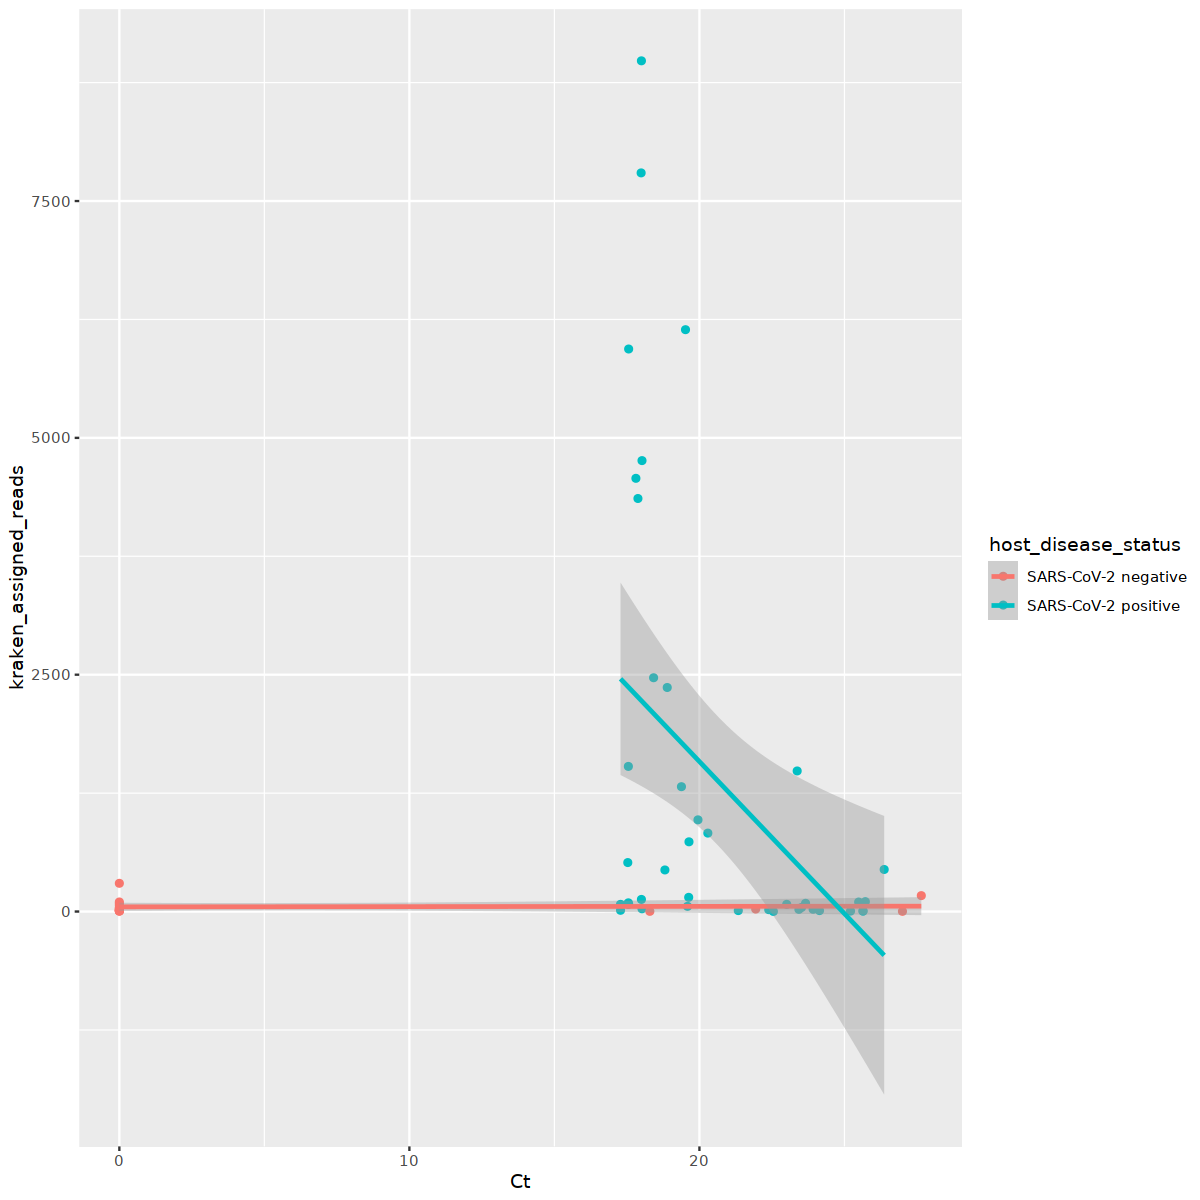

In [6]:
table %>%
    ggplot(aes(x=Ct, y=kraken_assigned_reads, group=host_disease_status, col=host_disease_status)) +
    geom_point() +
    geom_smooth(method=lm, formula=y~x)

## Is SARS-CoV-2 is present in rtPCR negative patients

In [68]:
sqlite3 -box -batch /shared/projects/2314_medbioinfo/pascal/central_database/sample_collab.db \
'select bracken_abundances_long.run_accession, kraken_assigned_reads, taxon_name, host_disease_status, Ct 
from bracken_abundances_long left join sample_annot 
on bracken_abundances_long.run_accession == sample_annot.run_accession
where taxon_name like "%Severe%" and host_disease_status == "SARS-CoV-2 negative" 
order by "kraken_assigned_reads" DESC'

┌───────────────┬───────────────────────┬───────────────────────────────────────────────────────┬─────────────────────┬───────┐
│ run_accession │ kraken_assigned_reads │                      taxon_name                       │ host_disease_status │  Ct   │
├───────────────┼───────────────────────┼───────────────────────────────────────────────────────┼─────────────────────┼───────┤
│ ERR6913305    │ 298                   │ Severe acute respiratory syndrome-related coronavirus │ SARS-CoV-2 negative │ 0.0   │
│ ERR6913275    │ 168                   │ Severe acute respiratory syndrome-related coronavirus │ SARS-CoV-2 negative │ 27.65 │
│ ERR6913334    │ 101                   │ Severe acute respiratory syndrome-related coronavirus │ SARS-CoV-2 negative │ 0.0   │
│ ERR6913315    │ 84                    │ Severe acute respiratory syndrome-related coronavirus │ SARS-CoV-2 negative │ 0.0   │
│ ERR6913268    │ 64                    │ Severe acute respiratory syndrome-related coronavirus │ SARS-C

## Compare to rtPCR positive patients

In [67]:
sqlite3 -box -batch /shared/projects/2314_medbioinfo/pascal/central_database/sample_collab.db \
'select bracken_abundances_long.run_accession, kraken_assigned_reads, taxon_name, host_disease_status, Ct 
from bracken_abundances_long left join sample_annot 
on bracken_abundances_long.run_accession == sample_annot.run_accession
where taxon_name like "%Severe%" and host_disease_status == "SARS-CoV-2 positive" 
order by "kraken_assigned_reads" DESC'

┌───────────────┬───────────────────────┬───────────────────────────────────────────────────────┬─────────────────────┬───────┐
│ run_accession │ kraken_assigned_reads │                      taxon_name                       │ host_disease_status │  Ct   │
├───────────────┼───────────────────────┼───────────────────────────────────────────────────────┼─────────────────────┼───────┤
│ ERR6913219    │ 11656                 │ Severe acute respiratory syndrome-related coronavirus │ SARS-CoV-2 positive │ 17.93 │
│ ERR6913197    │ 8980                  │ Severe acute respiratory syndrome-related coronavirus │ SARS-CoV-2 positive │ 18.0  │
│ ERR6913216    │ 7797                  │ Severe acute respiratory syndrome-related coronavirus │ SARS-CoV-2 positive │ 17.99 │
│ ERR6913210    │ 6142                  │ Severe acute respiratory syndrome-related coronavirus │ SARS-CoV-2 positive │ 19.52 │
│ ERR6913217    │ 5938                  │ Severe acute respiratory syndrome-related coronavirus │ SARS-C

## Is SARS-CoV-2 only ever seen in RNA samples (ie not in DNA samples) 

In [71]:
sqlite3 -box -batch /shared/projects/2314_medbioinfo/pascal/central_database/sample_collab.db \
'select bracken_abundances_long.run_accession, kraken_assigned_reads, host_disease_status, nuc 
from bracken_abundances_long left join sample_annot 
on bracken_abundances_long.run_accession == sample_annot.run_accession
where taxon_name like "%Severe%" and host_disease_status == "SARS-CoV-2 positive" and nuc == "RNA"
order by "kraken_assigned_reads" DESC'

┌───────────────┬───────────────────────┬─────────────────────┬─────┐
│ run_accession │ kraken_assigned_reads │ host_disease_status │ nuc │
├───────────────┼───────────────────────┼─────────────────────┼─────┤
│ ERR6913219    │ 11656                 │ SARS-CoV-2 positive │ RNA │
│ ERR6913197    │ 8980                  │ SARS-CoV-2 positive │ RNA │
│ ERR6913216    │ 7797                  │ SARS-CoV-2 positive │ RNA │
│ ERR6913210    │ 6142                  │ SARS-CoV-2 positive │ RNA │
│ ERR6913217    │ 5938                  │ SARS-CoV-2 positive │ RNA │
│ ERR6913200    │ 4760                  │ SARS-CoV-2 positive │ RNA │
│ ERR6913214    │ 4573                  │ SARS-CoV-2 positive │ RNA │
│ ERR6913221    │ 4360                  │ SARS-CoV-2 positive │ RNA │
│ ERR6913204    │ 2468                  │ SARS-CoV-2 positive │ RNA │
│ ERR6913215    │ 2365                  │ SARS-CoV-2 positive │ RNA │
│ ERR6913218    │ 1532                  │ SARS-CoV-2 positive │ RNA │
│ ERR6913327    │ 14

In [72]:
sqlite3 -box -batch /shared/projects/2314_medbioinfo/pascal/central_database/sample_collab.db \
'select bracken_abundances_long.run_accession, kraken_assigned_reads, host_disease_status, nuc 
from bracken_abundances_long left join sample_annot 
on bracken_abundances_long.run_accession == sample_annot.run_accession
where taxon_name like "%Severe%" and host_disease_status == "SARS-CoV-2 positive" and nuc == "DNA"
order by "kraken_assigned_reads" DESC'

┌───────────────┬───────────────────────┬─────────────────────┬─────┐
│ run_accession │ kraken_assigned_reads │ host_disease_status │ nuc │
├───────────────┼───────────────────────┼─────────────────────┼─────┤
│ ERR6913101    │ 128                   │ SARS-CoV-2 positive │ DNA │
│ ERR6913122    │ 92                    │ SARS-CoV-2 positive │ DNA │
│ ERR6913293    │ 79                    │ SARS-CoV-2 positive │ DNA │
│ ERR6913121    │ 77                    │ SARS-CoV-2 positive │ DNA │
│ ERR6913126    │ 76                    │ SARS-CoV-2 positive │ DNA │
│ ERR6913104    │ 29                    │ SARS-CoV-2 positive │ DNA │
│ ERR6913295    │ 5                     │ SARS-CoV-2 positive │ DNA │
└───────────────┴───────────────────────┴─────────────────────┴─────┘


## what are the 10 most ubiquitous human pathogens found in the 125 patients ? There is list known to be associated with upper airways and oral/nasal cavities in study supp tables 3 & 4 (in your docs folder). To make your day easier, I have compiled these for you:

In [77]:
sqlite3 -box -batch /shared/projects/2314_medbioinfo/pascal/central_database/sample_collab.db \
'select taxon_name, count(*) as abundance_amongst_cohort from bracken_abundances_long group by taxon_name 
order by abundance_amongst_cohort DESC limit 100'

┌──────────────────────────────────────┬──────────────────────────┐
│              taxon_name              │ abundance_amongst_cohort │
├──────────────────────────────────────┼──────────────────────────┤
│ Cutibacterium acnes                  │ 188                      │
│ Homo sapiens                         │ 184                      │
│ Streptococcus oralis                 │ 138                      │
│ Malassezia restricta                 │ 137                      │
│ Rothia mucilaginosa                  │ 136                      │
│ Streptococcus mitis                  │ 134                      │
│ Kocuria rhizophila                   │ 134                      │
│ Streptococcus thermophilus           │ 132                      │
│ Streptococcus suis                   │ 131                      │
│ Staphylococcus epidermidis           │ 130                      │
│ Veillonella parvula                  │ 129                      │
│ Prevotella melaninogenica            │ 129    

In [73]:
sqlite3 -box -batch /shared/projects/2314_medbioinfo/pascal/central_database/sample_collab.db \
 'select * from bracken_abundances_long limit 5'

┌───────────────┬──────────────────────────────────┬─────────────┬──────────────┬───────────────────────┬─────────────┬───────────────┬──────────────────────┐
│ run_accession │            taxon_name            │ taxonomy_id │ taxonomy_lvl │ kraken_assigned_reads │ added_reads │ new_est_reads │ fraction_total_reads │
├───────────────┼──────────────────────────────────┼─────────────┼──────────────┼───────────────────────┼─────────────┼───────────────┼──────────────────────┤
│ ERR6913112    │ Streptococcus oralis             │ 1303        │ S            │ 315                   │ 139         │ 454           │ 0.04101              │
│ ERR6913112    │ Streptococcus sp. LPB0220        │ 2610896     │ S            │ 64                    │ 14          │ 78            │ 0.00705              │
│ ERR6913112    │ Streptococcus sp. HSISM1         │ 1316408     │ S            │ 50                    │ 10          │ 60            │ 0.00542              │
│ ERR6913112    │ Streptococcus sp. oral taxon

In [2]:
suppressPackageStartupMessages({
    library(DBI)
    library(tidyverse)
    library(repr)
    library(ComplexHeatmap)
    library(viridis)
    library(circlize)})

In [4]:
mydb <- dbConnect(RSQLite::SQLite(), "/shared/projects/2314_medbioinfo/pascal/central_database/sample_collab.db")
options(tibble.width=200, tibble.print_max = 200, tibble.print_min = 5, width = 280, max.print=200,pillar.bold=TRUE, pillar.subtle=0, pillar.min_title_chars=7, pillar.sigfig=1)

abun_long <- as_tibble(dbGetQuery(mydb, "select * from bracken_abundances_long abu left join sample_annot spl using(run_accession);"))

In [6]:
head(abun_long)

run_accession,taxon_name,taxonomy_id,taxonomy_lvl,kraken_assigned_reads,added_reads,new_est_reads,fraction_total_reads,host_subject_id,patient_code,nuc,host_body_site,host_disease_status,miscellaneous_parameter,Ct,total_reads,read_count,base_count
<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>
ERR6913112,Streptococcus oralis,1303,S,315,139,454,0.04101,P259_DNA_S4_L001,P259,DNA,Nasopharyngeal,SARS-CoV-2 positive,Symptomatic-DNA-sequenced,19.95,25543682,63444,8094624
ERR6913112,Streptococcus sp. LPB0220,2610896,S,64,14,78,0.00705,P259_DNA_S4_L001,P259,DNA,Nasopharyngeal,SARS-CoV-2 positive,Symptomatic-DNA-sequenced,19.95,25543682,63444,8094624
ERR6913112,Streptococcus sp. HSISM1,1316408,S,50,10,60,0.00542,P259_DNA_S4_L001,P259,DNA,Nasopharyngeal,SARS-CoV-2 positive,Symptomatic-DNA-sequenced,19.95,25543682,63444,8094624
ERR6913112,Streptococcus sp. oral taxon 064,712624,S,14,21,35,0.00316,P259_DNA_S4_L001,P259,DNA,Nasopharyngeal,SARS-CoV-2 positive,Symptomatic-DNA-sequenced,19.95,25543682,63444,8094624
ERR6913112,Streptococcus sp. oral taxon 061,712623,S,11,1,12,0.00108,P259_DNA_S4_L001,P259,DNA,Nasopharyngeal,SARS-CoV-2 positive,Symptomatic-DNA-sequenced,19.95,25543682,63444,8094624
ERR6913112,Streptococcus salivarius,1304,S,171,60,231,0.02087,P259_DNA_S4_L001,P259,DNA,Nasopharyngeal,SARS-CoV-2 positive,Symptomatic-DNA-sequenced,19.95,25543682,63444,8094624


## Filter taxon groups that at least make up 10% of all reads and order by proportions.

In [7]:
abun_long %>%
 select(run_accession, taxon_name, fraction_total_reads, new_est_reads, read_count, total_reads) %>%
 filter(fraction_total_reads>0.1) %>%
 arrange(desc(fraction_total_reads)) %>% 
 slice_head(n=10)

run_accession,taxon_name,fraction_total_reads,new_est_reads,read_count,total_reads
<chr>,<chr>,<dbl>,<int>,<int>,<int>
ERR6913115,Cutibacterium acnes,1.00000,79,33254,18306476
ERR6913154,Haemophilus influenzae,0.98190,15187,39244,18749066
ERR6913269,Influenza A virus,0.97180,11614,25426,23544470
ERR6913264,Haemophilus influenzae,0.92120,4618,21382,18079420
ERR6913250,Haemophilus influenzae,0.88349,73565,169548,18898684
ERR6913252,Cutibacterium acnes,0.86638,6542,19934,22690768
ERR6913216,Severe acute respiratory syndrome-related coronavirus,0.77822,7797,39552,17198782
ERR6913199,Severe acute respiratory syndrome-related coronavirus,0.75690,439,62396,20758064
ERR6913221,Severe acute respiratory syndrome-related coronavirus,0.73823,4360,23570,19171612


## Add columns to table corresponding to the fraction of bracken reads relative to the total non-human reads for each taxon.

In [5]:
abun_long <- abun_long %>% 
    mutate(fraction_nonhuman_reads=new_est_reads/read_count,
           fraction_human_nonhuman_reads=new_est_reads/total_reads)

## Do fraction of total reads proportion add to 1 per sample?

In [9]:
abun_long %>% 
    group_by(run_accession) %>%
    summarise(sum(fraction_total_reads))

run_accession,sum(fraction_total_reads)
<chr>,<dbl>
ERR6913101,0.99698
ERR6913102,0.99527
ERR6913103,0.99008
ERR6913104,0.99840
ERR6913106,0.99967
ERR6913107,0.99770
ERR6913108,0.99640
ERR6913109,0.99193
ERR6913111,0.98855


## first 20 samples with highest SARS-CoV-2 abundance

In [10]:
abun_long %>%
    dplyr::filter(taxon_name=="Severe acute respiratory syndrome-related coronavirus") %>%
    arrange(desc(fraction_nonhuman_reads)) %>%
    dplyr::select(run_accession, taxon_name, fraction_nonhuman_reads) %>%
    head(n=20)

run_accession,taxon_name,fraction_nonhuman_reads
<chr>,<chr>,<dbl>
ERR6913216,Severe acute respiratory syndrome-related coronavirus,0.1971328883
ERR6913221,Severe acute respiratory syndrome-related coronavirus,0.1849809079
ERR6913214,Severe acute respiratory syndrome-related coronavirus,0.0576540004
ERR6913210,Severe acute respiratory syndrome-related coronavirus,0.0569822244
ERR6913204,Severe acute respiratory syndrome-related coronavirus,0.0518487395
ERR6913203,Severe acute respiratory syndrome-related coronavirus,0.0412597045
ERR6913217,Severe acute respiratory syndrome-related coronavirus,0.0292371171
ERR6913215,Severe acute respiratory syndrome-related coronavirus,0.0278418723
ERR6913219,Severe acute respiratory syndrome-related coronavirus,0.0189486553


In [11]:
table(is.na(abun_long$Ct))


 FALSE   TRUE 
103405  41313 

## relationship between SARS-CoV-2 abundance and Ct values 

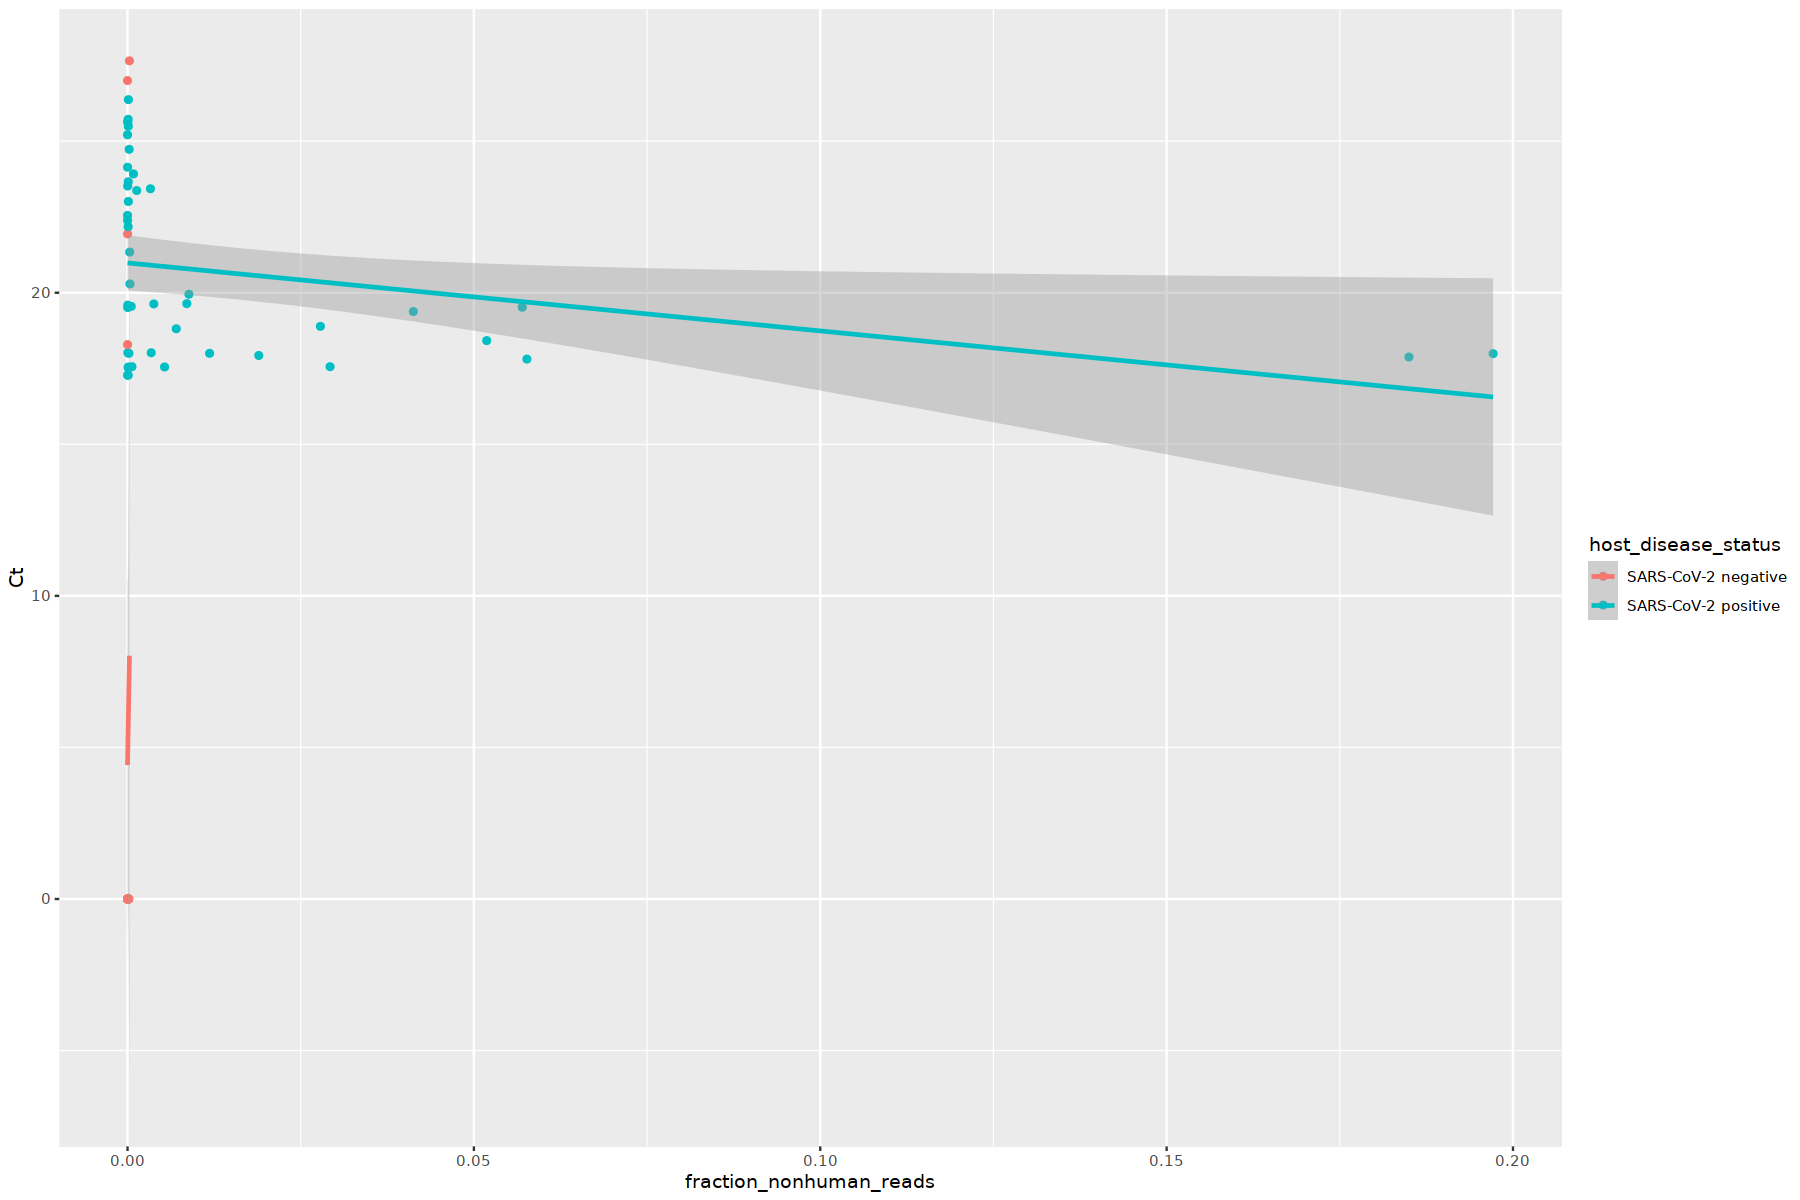

In [12]:
options(repr.plot.width=15, repr.plot.height=10)

abun_long %>%
    select(run_accession, taxon_name, 
                  fraction_nonhuman_reads, Ct, host_disease_status) %>%
    filter(taxon_name=="Severe acute respiratory syndrome-related coronavirus", !is.na(Ct)) %>%
    ggplot(aes(x=fraction_nonhuman_reads, y=Ct, col=host_disease_status)) +
    geom_point() +
    geom_smooth(method=lm, formula=y~x)

## check if SARS-CoV-2 is present in rtPCR negative patients
#### cutoff is any reads aligning to SARS-CoV-2 identified in patients.

In [13]:
SARS_detection_table <- abun_long %>%
    select(run_accession, taxon_name, 
                  fraction_nonhuman_reads, nuc, host_disease_status) %>%
    filter(taxon_name=="Severe acute respiratory syndrome-related coronavirus")

table(SARS_detection_table$host_disease_status)


SARS-CoV-2 negative SARS-CoV-2 positive 
                 19                  48 

## check if SARS-CoV-2 only ever seen in RNA samples (ie not in DNA samples)

In [14]:
table(SARS_detection_table$nuc)


DNA RNA 
 13  54 

## what are the 50 most ubiquitous human pathogens found in the 125 patients ?

In [6]:
taxa_freq <- table(abun_long %>% 
    pull(taxon_name)) %>% as.data.frame() %>% arrange(desc(Freq))

taxa_freq[1:50,]

,Var1,Freq
,<fct>,<int>
1,Cutibacterium acnes,196
2,Homo sapiens,192
3,Streptococcus oralis,145
4,Rothia mucilaginosa,143
5,Streptococcus mitis,142
6,Kocuria rhizophila,140
7,Malassezia restricta,140
8,Streptococcus thermophilus,139
9,Streptococcus suis,137


## Add pseudo_count to all abundance values

In [7]:
min_abun <- min(abun_long %>% filter(fraction_nonhuman_reads > 0) %>% pull(fraction_nonhuman_reads))
min_abun
class(min_abun)

[1] 3.659628e-07

[1] "numeric"

In [8]:
abun_wide_pseudo_counts <- pivot_wider(data=abun_long,
            id_cols=taxon_name,
            names_from=run_accession,
            values_from=fraction_nonhuman_reads) %>%
    replace(is.na(.),0) 

cols <- colnames(abun_wide_pseudo_counts)[2:ncol(abun_wide_pseudo_counts)]

abun_wide_pseudo_counts <- abun_wide_pseudo_counts %>%
    mutate(across(all_of(cols), function(x) as.numeric(x) + min_abun))

head(abun_wide_pseudo_counts)

taxon_name,ERR6913112,ERR6913113,ERR6913320,ERR6913209,ERR6913122,ERR6913208,ERR6913218,ERR6913349,ERR6913179,⋯,ERR6913290,ERR6913292,ERR6913300,ERR6913329,ERR6913301,ERR6913330,ERR6913303,ERR6913332,ERR6913127,ERR6913223
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Streptococcus oralis,0.0071562830,3.659628e-07,3.536663e-03,3.659628e-07,1.556732e-03,3.659628e-07,2.036108e-03,4.494458e-04,2.545590e-03,⋯,0.0019740594,0.0013118355,3.211896e-03,6.914531e-04,2.970866e-03,1.011738e-03,3.771371e-03,0.0033703193,3.659628e-07,1.162197e-04
Streptococcus sp. LPB0220,0.0012297966,3.659628e-07,7.011061e-03,3.659628e-07,2.671680e-03,3.659628e-07,4.571184e-03,6.351532e-04,3.730309e-03,⋯,0.0009991354,0.0017906848,6.110509e-03,3.378499e-03,7.911776e-04,5.054459e-04,5.432781e-03,0.0045348794,3.659628e-07,3.659628e-07
Streptococcus sp. HSISM1,0.0009460819,3.659628e-07,6.701028e-03,3.659628e-07,2.768282e-03,3.659628e-07,4.249935e-03,3.583146e-04,3.554523e-03,⋯,0.0008810812,0.0013022142,5.755829e-03,2.651079e-03,7.328029e-04,3.556803e-04,4.839254e-03,0.0033100626,3.659628e-07,3.659628e-07
Streptococcus sp. oral taxon 064,0.0005520336,3.659628e-07,9.428302e-05,3.659628e-07,5.269206e-05,3.659628e-07,3.659628e-07,1.821642e-05,5.236698e-05,⋯,0.0001207656,0.0001576387,8.330109e-05,3.659628e-07,8.187022e-05,7.009488e-05,6.813095e-05,0.0001088279,3.659628e-07,3.659628e-07
Streptococcus sp. oral taxon 061,0.0001895091,3.659628e-07,1.960351e-03,3.659628e-07,1.508431e-03,3.659628e-07,2.084994e-03,1.528777e-04,3.542088e-03,⋯,0.0010976442,0.0003504366,4.138652e-04,1.472413e-04,7.394113e-04,2.071274e-04,1.417355e-03,0.0005928896,3.659628e-07,3.659628e-07
Streptococcus salivarius,0.0036413722,3.659628e-07,3.821616e-03,3.659628e-07,1.532923e-02,3.659628e-07,2.689102e-02,9.833936e-04,3.603538e-02,⋯,0.0183835869,0.0022639832,9.769653e-03,1.551060e-03,1.192312e-02,1.610350e-02,1.387630e-02,0.0043533060,3.659628e-07,1.136641e-04


In [9]:
abun_wide_log_norm <- abun_wide_pseudo_counts %>%
    mutate(across(all_of(cols), function(x) log2(x)))
head(abun_wide_log_norm)

taxon_name,ERR6913112,ERR6913113,ERR6913320,ERR6913209,ERR6913122,ERR6913208,ERR6913218,ERR6913349,ERR6913179,⋯,ERR6913290,ERR6913292,ERR6913300,ERR6913329,ERR6913301,ERR6913330,ERR6913303,ERR6913332,ERR6913127,ERR6913223
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Streptococcus oralis,-7.126574,-21.3818,-8.143395,-21.3818,-9.327264,-21.3818,-8.939970,-11.119565,-8.617784,⋯,-8.984619,-9.574197,-8.282359,-10.498081,-8.394901,-9.948948,-8.050695,-8.212899,-21.3818,-13.07086
Streptococcus sp. LPB0220,-9.667365,-21.3818,-7.156152,-21.3818,-8.548037,-21.3818,-7.773216,-10.620608,-8.066489,⋯,-9.967032,-9.125273,-7.354492,-8.209402,-10.303711,-10.950156,-7.524093,-7.784720,-21.3818,-21.38180
Streptococcus sp. HSISM1,-10.045747,-21.3818,-7.221402,-21.3818,-8.496793,-21.3818,-7.878344,-11.446486,-8.136128,⋯,-10.148437,-9.584818,-7.440761,-8.559204,-10.414287,-11.457131,-7.691000,-8.238926,-21.3818,-21.38180
Streptococcus sp. oral taxon 064,-10.822956,-21.3818,-13.372643,-21.3818,-14.212055,-21.3818,-21.381800,-15.744401,-14.220983,⋯,-13.015503,-12.631091,-13.551305,-21.381800,-13.576302,-13.800331,-13.841330,-13.165664,-21.3818,-21.38180
Streptococcus sp. oral taxon 061,-12.365445,-21.3818,-8.994672,-21.3818,-9.372736,-21.3818,-8.905741,-12.675334,-8.141184,⋯,-9.831374,-11.478559,-11.238551,-12.729530,-10.401335,-12.237194,-9.462583,-10.719949,-21.3818,-21.38180
Streptococcus salivarius,-8.101302,-21.3818,-8.031601,-21.3818,-6.027571,-21.3818,-5.216732,-9.989943,-4.794442,⋯,-5.765438,-8.786921,-6.677477,-9.332529,-6.390095,-5.956482,-6.171233,-7.843673,-21.3818,-13.10294


In [10]:
mat_for_heatmap <- as.data.frame(abun_wide_log_norm)
rownames(mat_for_heatmap) <- mat_for_heatmap[,1]
mat_for_heatmap[,1] <- NULL
mat_for_heatmap <- as.matrix(mat_for_heatmap)
head(mat_for_heatmap)
#head(mat_for_heatmap[taxa_freq[1:50,1],])

,ERR6913112,ERR6913113,ERR6913320,ERR6913209,ERR6913122,ERR6913208,ERR6913218,ERR6913349,ERR6913179,ERR6913180,⋯,ERR6913290,ERR6913292,ERR6913300,ERR6913329,ERR6913301,ERR6913330,ERR6913303,ERR6913332,ERR6913127,ERR6913223
Streptococcus oralis,-7.126574,-21.3818,-8.143395,-21.3818,-9.327264,-21.3818,-8.939970,-11.119565,-8.617784,-7.488062,⋯,-8.984619,-9.574197,-8.282359,-10.498081,-8.394901,-9.948948,-8.050695,-8.212899,-21.3818,-13.07086
Streptococcus sp. LPB0220,-9.667365,-21.3818,-7.156152,-21.3818,-8.548037,-21.3818,-7.773216,-10.620608,-8.066489,-11.493722,⋯,-9.967032,-9.125273,-7.354492,-8.209402,-10.303711,-10.950156,-7.524093,-7.784720,-21.3818,-21.38180
Streptococcus sp. HSISM1,-10.045747,-21.3818,-7.221402,-21.3818,-8.496793,-21.3818,-7.878344,-11.446486,-8.136128,-11.360426,⋯,-10.148437,-9.584818,-7.440761,-8.559204,-10.414287,-11.457131,-7.691000,-8.238926,-21.3818,-21.38180
Streptococcus sp. oral taxon 064,-10.822956,-21.3818,-13.372643,-21.3818,-14.212055,-21.3818,-21.381800,-15.744401,-14.220983,-13.259699,⋯,-13.015503,-12.631091,-13.551305,-21.381800,-13.576302,-13.800331,-13.841330,-13.165664,-21.3818,-21.38180
Streptococcus sp. oral taxon 061,-12.365445,-21.3818,-8.994672,-21.3818,-9.372736,-21.3818,-8.905741,-12.675334,-8.141184,-7.095243,⋯,-9.831374,-11.478559,-11.238551,-12.729530,-10.401335,-12.237194,-9.462583,-10.719949,-21.3818,-21.38180
Streptococcus salivarius,-8.101302,-21.3818,-8.031601,-21.3818,-6.027571,-21.3818,-5.216732,-9.989943,-4.794442,-6.271764,⋯,-5.765438,-8.786921,-6.677477,-9.332529,-6.390095,-5.956482,-6.171233,-7.843673,-21.3818,-13.10294


In [11]:
min.pseudo.count <- min(apply(mat_for_heatmap, 2, function(x) min(x)))

In [13]:
taxa_freq <- taxa_freq %>% filter(Var1 != "Severe acute respiratory syndrome-related coronavirus")
top500 <- taxa_freq[1:500,]$Var1
taxa_df <- data.frame(taxon_name = abun_wide_pseudo_counts$taxon_name) %>%
    mutate(classification=case_when(taxon_name %in% top500 ~ "top 500 human pathogens",
                                    taxon_name == "Severe acute respiratory syndrome-related coronavirus" ~ "SARS-CoV-2"
                                    , TRUE ~ "other"))
head(taxa_df)

,taxon_name,classification
,<chr>,<chr>
1,Streptococcus oralis,top 500 human pathogens
2,Streptococcus sp. LPB0220,top 500 human pathogens
3,Streptococcus sp. HSISM1,top 500 human pathogens
4,Streptococcus sp. oral taxon 064,top 500 human pathogens
5,Streptococcus sp. oral taxon 061,top 500 human pathogens
6,Streptococcus salivarius,top 500 human pathogens


### Heatmap annotataions

In [39]:
# Create ordered table with first instance of each accession number to retreive ordered meta data. 
acc_order <- colnames(mat_for_heatmap)
ordered_abun_long_distinct <- abun_long %>% group_by(run_accession) %>%
slice(1) %>%
arrange(match(run_accession, acc_order))

# annotation meta data 
nuc_ <- ordered_abun_long_distinct$nuc
disease_status_ <- ordered_abun_long_distinct$host_disease_status
presentation <- gsub("-[DNA|cDNA].*", "", ordered_abun_long_distinct$miscellaneous_parameter)
Ct_ <- ordered_abun_long_distinct$Ct

# row annotation data

taxa_classification <- taxa_df$classification
sars_cov2_idx <- which(taxa_df$classification == "SARS-CoV-2") 

# Colors

col_fun = colorRamp2(c(min.pseudo.count, -15, -10, -5, 0), c("white", inferno(9)[7], inferno(9)[5], inferno(9)[3], inferno(9)[1]))
col_fun_nuc = c("DNA" = "#000000FF", "RNA" = "#89ABE3FF")
col_fun_disease_status = c("SARS-CoV-2 negative" = "#FFDB00", "SARS-CoV-2 positive" = "#2038E2")
col_fun_presentation = c("Symptomatic" = "#CB61EE", "Asymptomatic" = "#0DF30B")
col_fun_Ct = colorRamp2(c(max(Ct_, na.rm = TRUE), 0), c("#E8F995", "#2F8E04")) 
col_fun_path = c("top 500 human pathogens" = "red", "SARS-CoV-2" = "forestgreen", "other" = "grey30") 

column_ha = HeatmapAnnotation(NUCLEOTIDE = nuc_, DISEASE = disease_status_, PRESENTATION = presentation, `CT VALUE` = Ct_,
                              col = list(
                                     NUCLEOTIDE = col_fun_nuc,
                                     DISEASE = col_fun_disease_status,
                                     PRESENTATION = col_fun_presentation,
                                     `CT VALUE` = col_fun_Ct),
                              na_col = "grey50",
                              border = TRUE,
                              show_legend = TRUE)

row_ha <- rowAnnotation(TAXA = taxa_classification, sars_label = anno_mark(at = sars_cov2_idx, labels = "SARS-CoV-2", side = "right"),
                        col = list(TAXA = col_fun_path), border = TRUE, show_legend = TRUE)

In [40]:
options(repr.plot.width = 30, repr.plot.height = 45)
plot <- Heatmap(mat_for_heatmap, name = "NORMALISED ABUNDANCE", na_col = "#06914E", col=col_fun,
             top_annotation = column_ha,
             right_annotation = row_ha,
             column_split = nuc_,
             show_row_names = FALSE,
             show_column_names = TRUE,
             cluster_rows = TRUE,
             cluster_columns = TRUE,
             show_heatmap_legend = TRUE
            )

`use_raster` is automatically set to TRUE for a matrix with more than 2000 rows. You can control `use_raster` argument by explicitly setting TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



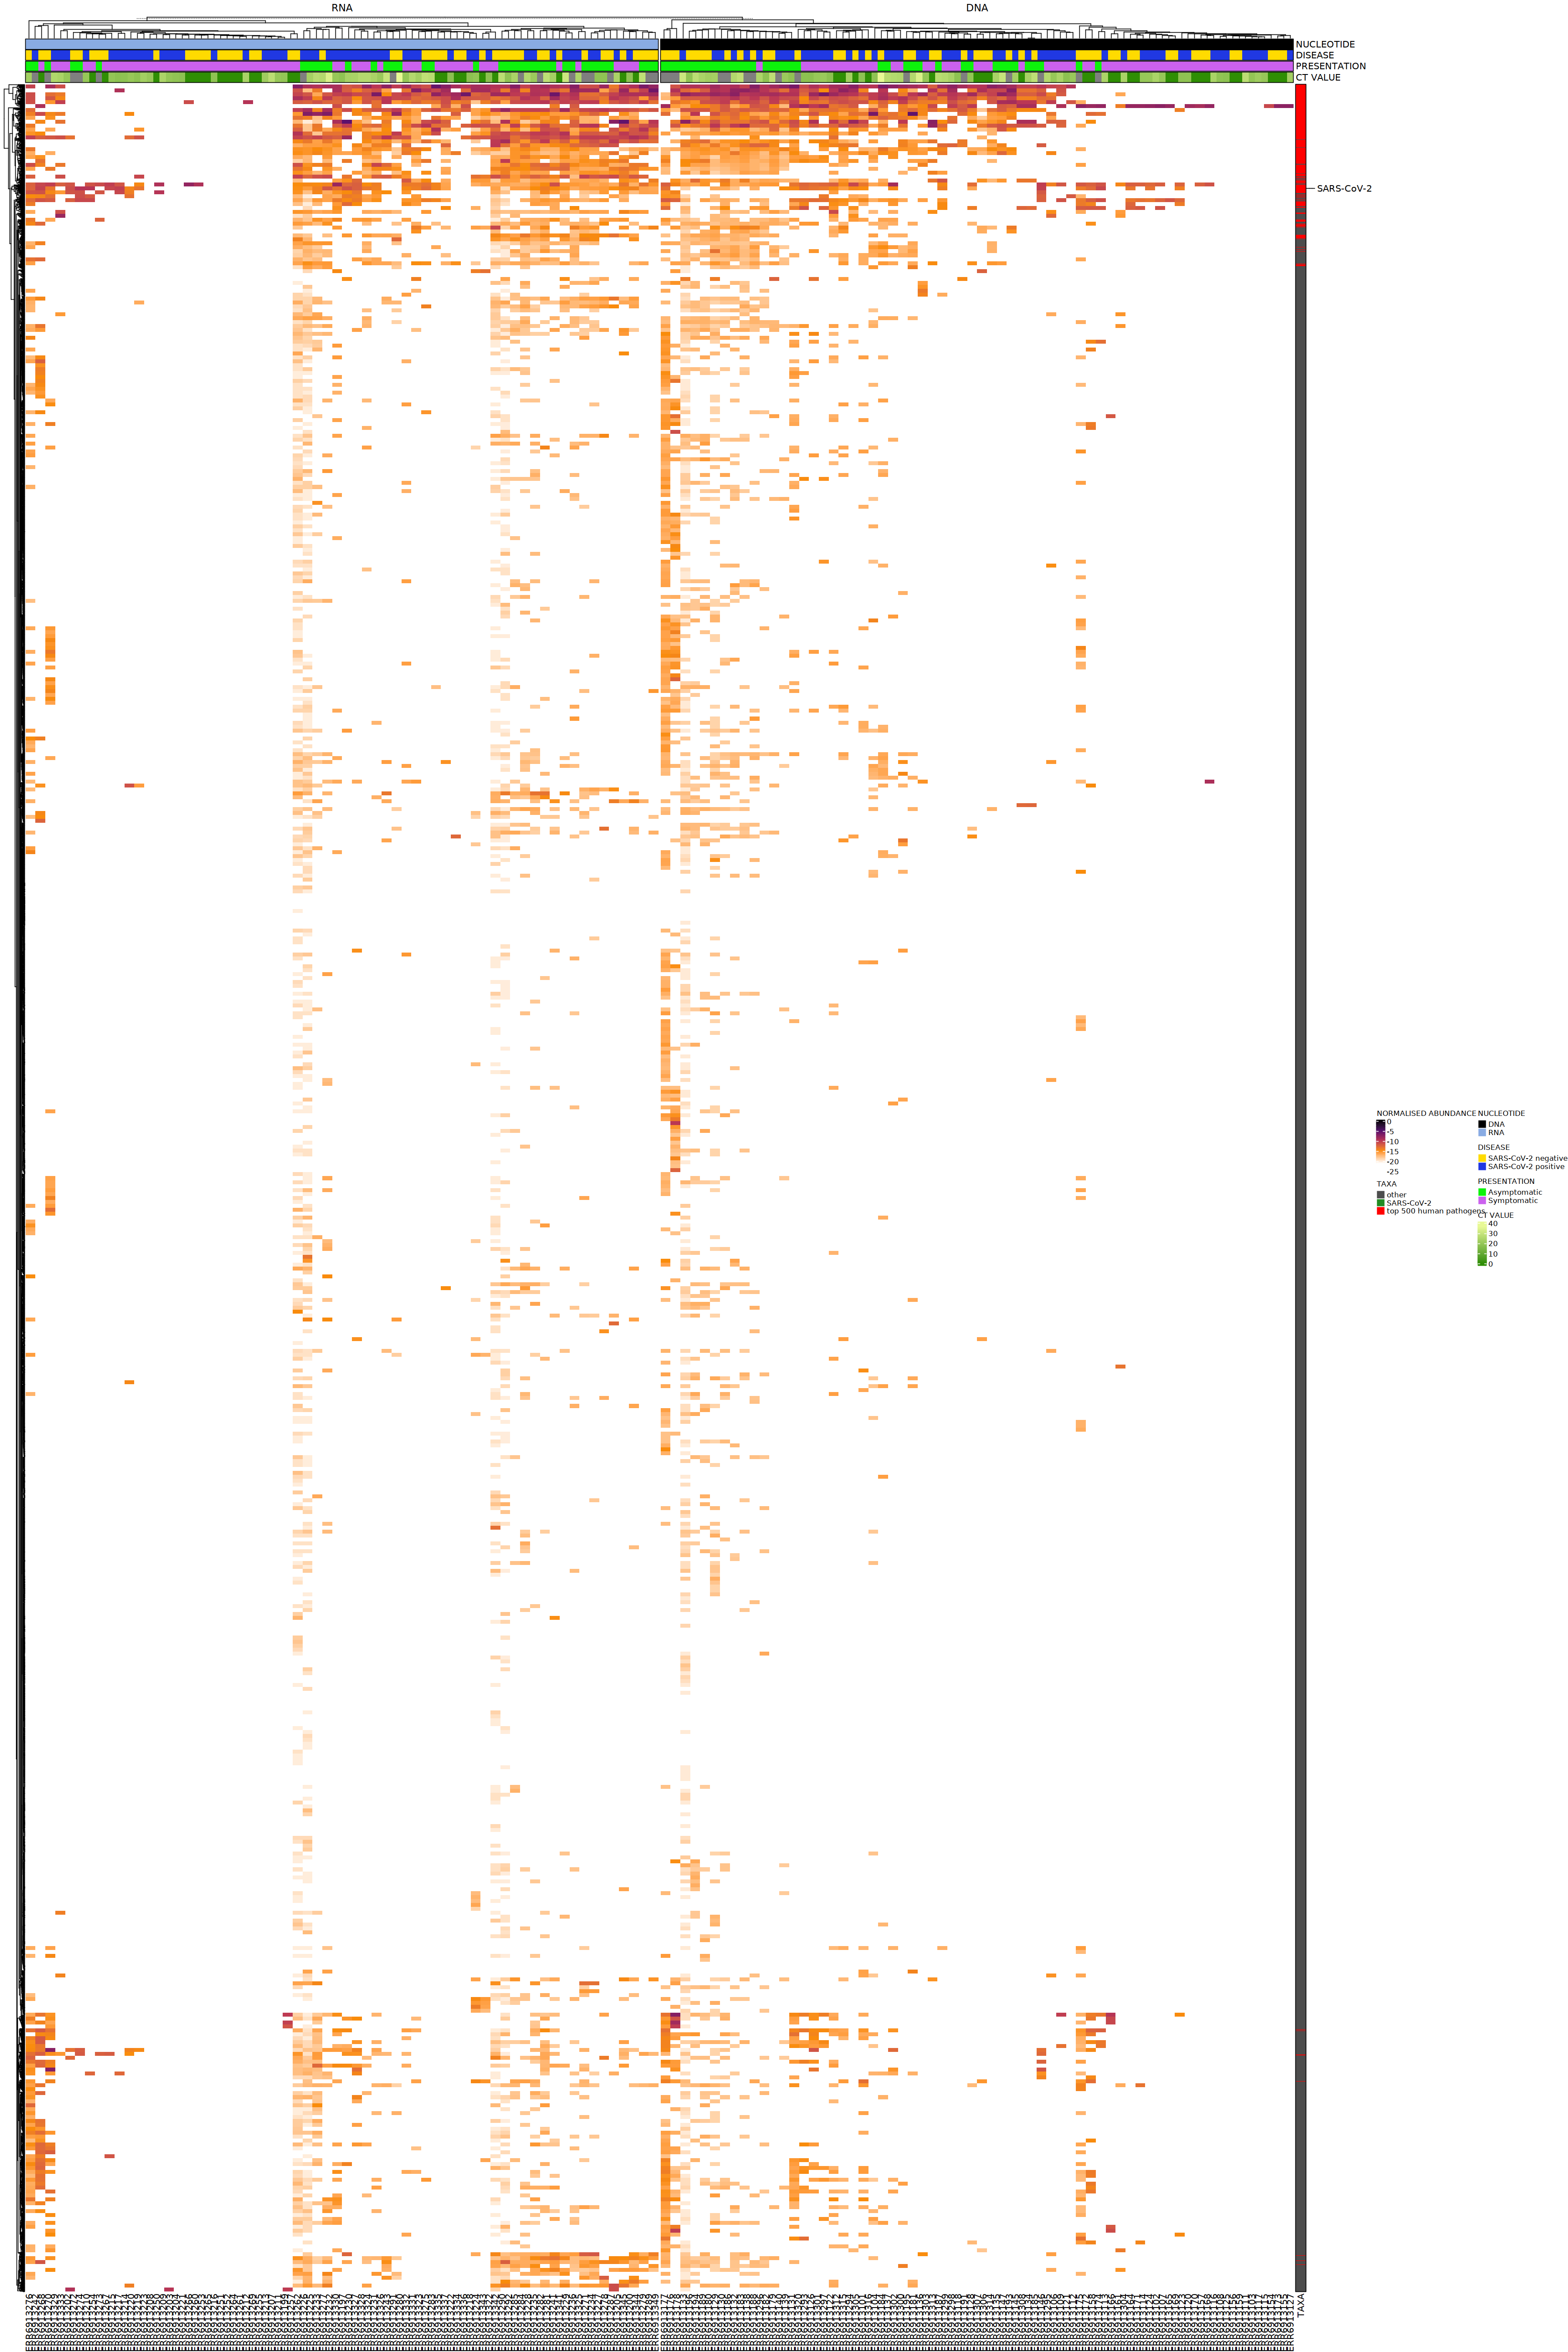

In [41]:
plot